# Import required libraries + set visualization settings

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random as rnd
import plotly.express as px 

from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
%config InlineBackend.figure_format = 'retina'

# %%javascript
# IPython.OutputArea.auto_scroll_threshold = 9999; # Increase cell-output's length.

### About Dataset
### Pulsar Classification For Class Prediction

- Link: https://www.kaggle.com/datasets/brsdincer/pulsar-classification-for-class-prediction 

What are pulsars?
- Pulsars are rotating neutron stars observed to have pulses of radiation at very regular intervals that typically range from milliseconds to seconds. Pulsars have very strong magnetic fields which funnel jets of particles out along the two magnetic poles.

17898 entries

Data can be useful for prediction models of classification.

COLUMNS:
Based on Integrated Profile of Observation

- Mean_Integrated: Mean of Observations

- SD: Standard deviation of Observations

- EK: Excess kurtosis of Observations

- Skewness: In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. Skewness of Observations.

- Mean _ DMSNR _ Curve: Mean of DM SNR CURVE of Observations

- SD _ DMSNR _ Curve: Standard deviation of DM SNR CURVE of Observations

- EK _ DMSNR _ Curve: Excess kurtosis of DM SNR CURVE of Observations

- Skewness _ DMSNR _ Curve: Skewness of DM SNR CURVE of Observations

- Class: Class 0 - 1

- WHAT IS DM SNR CURVE:

    - Radio waves emitted from pulsars reach earth after traveling long distances in space which is filled with free electrons. The important point is that pulsars emit a wide range of frequencies, and the amount by which the electrons slow down the wave depends on the frequency. Waves with higher frequency are sowed down less as compared to waves with higher frequency. It means dispersion.

TARGET:

Class
0 -- It is not
1 -- It is

## Looking at the data

In [5]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e10/train.csv')
df_train

id  Mean_Integrated         SD        EK  Skewness  \
0            0       133.171875  59.716081  0.043133 -0.703383   
1            1        87.093750  36.257973  0.435469  2.266057   
2            2       112.640625  39.818393  0.379639  0.922306   
3            3       120.679688  45.918448 -0.098490  0.011775   
4            4       134.070312  57.720107 -0.107772 -0.573335   
...        ...              ...        ...       ...       ...   
117559  117559       132.843750  56.748838 -0.060070 -0.554084   
117560  117560       112.578125  52.539271  0.179580 -0.306961   
117561  117561       119.757812  49.980013  0.064402 -0.270822   
117562  117562       105.789062  46.986595  0.441426  0.372466   
117563  117563       113.515625  50.935956  0.031517 -0.443831   

        Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  \
0              54.917224       70.084438        0.749798   
1               3.417224       21.865069        7.039330   
2               2.730769       15.689690        8.193471   
3               2.696488       20.954662        8.183874   
4               1.107860       11.255051       16.107748   
...                  ...             ...             ...   
117559          4.054348       27.844144        6.564423   
117560          1.637960       15.331913       11.384718   
117561          3.877926       19.788559        6.959740   
117562          2.097826       17.170612        9.442445   
117563         23.290970       62.006842        2.386364   

        Skewness_DMSNR_Curve  Class  
0                  -0.649512      0  
1                  52.686251      0  
2                  85.649785      0  
3                  70.332899      0  
4                 308.753765      0  
...                      ...    ...  
117559             44.442664      0  
117560            142.535470      0  
117561             56.367789      0  
117562             99.074539      0  
117563              4.001859      0  

[117564 rows x 10 columns]

In [6]:
df_train.head()

id  Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0   0       133.171875  59.716081  0.043133 -0.703383         54.917224   
1   1        87.093750  36.257973  0.435469  2.266057          3.417224   
2   2       112.640625  39.818393  0.379639  0.922306          2.730769   
3   3       120.679688  45.918448 -0.098490  0.011775          2.696488   
4   4       134.070312  57.720107 -0.107772 -0.573335          1.107860   

   SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0       70.084438        0.749798             -0.649512      0  
1       21.865069        7.039330             52.686251      0  
2       15.689690        8.193471             85.649785      0  
3       20.954662        8.183874             70.332899      0  
4       11.255051       16.107748            308.753765      0

In [7]:
df_train.tail()

id  Mean_Integrated         SD        EK  Skewness  \
117559  117559       132.843750  56.748838 -0.060070 -0.554084   
117560  117560       112.578125  52.539271  0.179580 -0.306961   
117561  117561       119.757812  49.980013  0.064402 -0.270822   
117562  117562       105.789062  46.986595  0.441426  0.372466   
117563  117563       113.515625  50.935956  0.031517 -0.443831   

        Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  \
117559          4.054348       27.844144        6.564423   
117560          1.637960       15.331913       11.384718   
117561          3.877926       19.788559        6.959740   
117562          2.097826       17.170612        9.442445   
117563         23.290970       62.006842        2.386364   

        Skewness_DMSNR_Curve  Class  
117559             44.442664      0  
117560            142.535470      0  
117561             56.367789      0  
117562             99.074539      0  
117563              4.001859      0

In [8]:
df_train.sample(10)

id  Mean_Integrated         SD        EK   Skewness  \
29500  29500       119.898438  52.480519  0.164828  -0.390078   
55100  55100       114.148438  49.664421  0.067510  -0.269866   
59774  59774       138.343750  52.753128  0.132405  -0.560667   
87656  87656       130.765625  46.898429 -0.082235   0.002420   
30774  30774        34.640625  29.671810  4.838104  27.386162   
92834  92834       133.273438  48.197021 -0.125858   0.067512   
29171  29171        83.242188  39.823879  0.651759   1.755207   
21763  21763       117.953125  43.837187  0.093686   0.278842   
83678  83678       124.148438  45.469039  0.118942   0.181065   
52357  52357       120.515625  45.543675  0.145096   0.077016   

       Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  \
29500          3.072742       18.795420        8.491884             86.524010   
55100          2.142977       19.955267        9.822360            100.267942   
59774         17.132107       47.949116        2.802044              6.229853   
87656          3.072742       19.078382        7.669737             65.924447   
30774         55.185619       74.501039        1.031263              0.162346   
92834         96.632943       84.704537       -0.191462             -1.619489   
29171          2.982441       22.099339        7.816541             63.457027   
21763          2.077759       14.141944       10.777727            145.169215   
83678          2.262542       13.872773        9.917489            132.791085   
52357          1.171405       12.310041       13.634963            218.878106   

       Class  
29500      0  
55100      0  
59774      0  
87656      0  
30774      1  
92834      0  
29171      0  
21763      0  
83678      0  
52357      0

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    117564 non-null  int64  
 1   Mean_Integrated       117564 non-null  float64
 2   SD                    117564 non-null  float64
 3   EK                    117564 non-null  float64
 4   Skewness              117564 non-null  float64
 5   Mean_DMSNR_Curve      117564 non-null  float64
 6   SD_DMSNR_Curve        117564 non-null  float64
 7   EK_DMSNR_Curve        117564 non-null  float64
 8   Skewness_DMSNR_Curve  117564 non-null  float64
 9   Class                 117564 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 9.0 MB


### We don't have any categorical columns!!

In [10]:
df_train.describe()

id  Mean_Integrated             SD             EK  \
count  117564.000000    117564.000000  117564.000000  117564.000000   
mean    58781.500000       111.248300      46.713535       0.503498   
std     33937.947861        24.906474       6.102941       1.127093   
min         0.000000         6.054688      24.783273      -1.730782   
25%     29390.750000       104.546875      43.443390       0.049761   
50%     58781.500000       116.664062      47.478932       0.186498   
75%     88172.250000       126.296875      50.862718       0.395620   
max    117563.000000       189.367188      93.602933       7.879628   

            Skewness  Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  \
count  117564.000000     117564.000000   117564.000000   117564.000000   
mean        1.886385         11.962921       26.190678        8.037488   
std         6.515466         26.719946       20.041937        3.840980   
min        -1.791886          0.213211        7.370432       -2.597872   
25%        -0.188956          2.090301       14.955405        6.742911   
50%         0.091720          2.808528       18.164924        8.442883   
75%         0.691613          4.122910       24.732218       10.003237   
max        65.385974        217.371238      109.890785       34.539844   

       Skewness_DMSNR_Curve          Class  
count         117564.000000  117564.000000  
mean              93.881076       0.093285  
std               79.962110       0.290833  
min               -1.976976       0.000000  
25%               49.409136       0.000000  
50%               83.421375       0.000000  
75%              122.093290       0.000000  
max             1191.000837       1.000000

### Observations
- id is a unique column. It is not useful in training the model, so remove it. But, add it back when submitting the model (as submission.csv has id column)
- EK, Skewness, Mean_DMSNR_Curve, SD_DMSNR_Curve columns mean and median are very far away. Mean > median. So it is skewed.
- Target class has mean 0.09

In [11]:
plt.style.use('tableau-colorblind10')

<AxesSubplot:xlabel='Class', ylabel='count'>

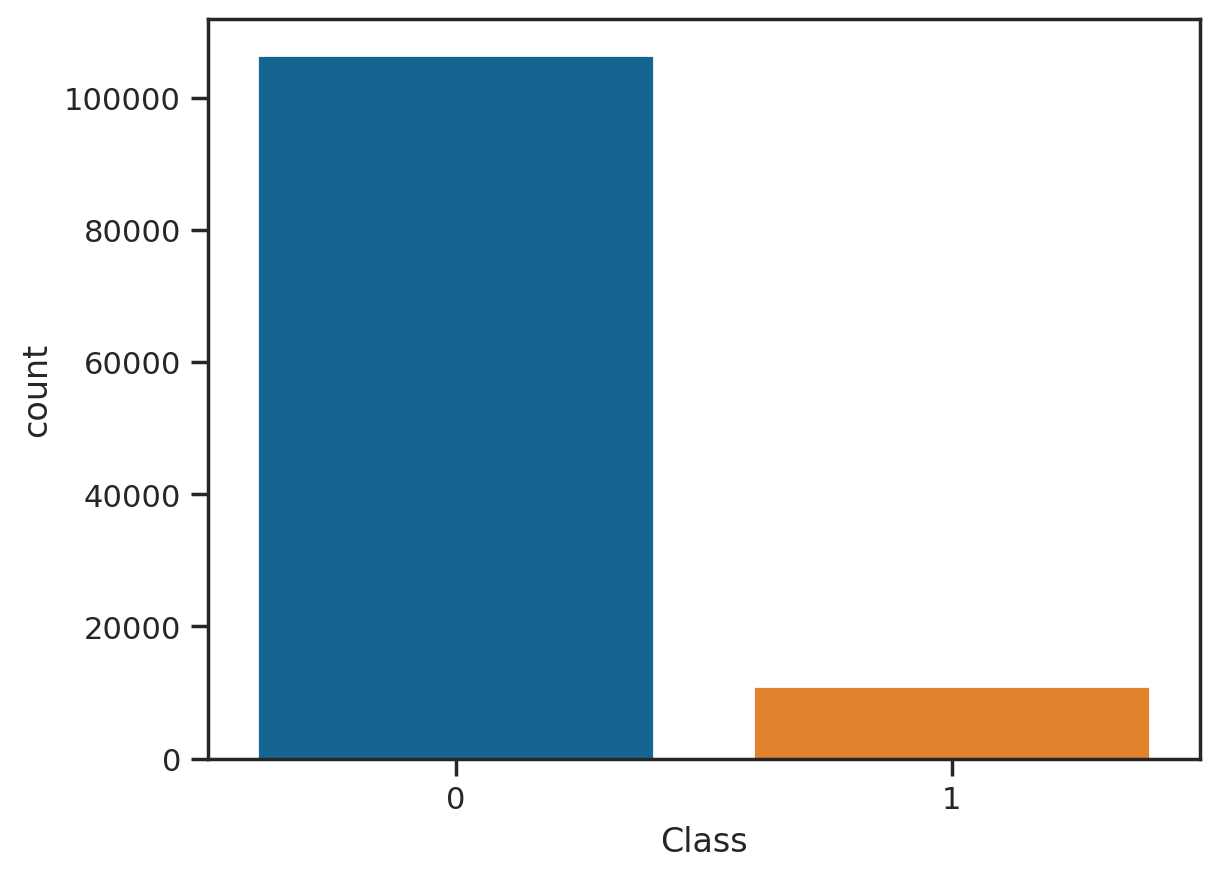

In [12]:
sns.countplot(x = df_train['Class'])

In [13]:
target_class_distribution = df_train['Class'].value_counts()
print("Class", target_class_distribution.index[0],"has", target_class_distribution.values[0], "values") 
print("Class", target_class_distribution.index[1],"has", target_class_distribution.values[1], "values") 
print("Class", target_class_distribution.index[0],"share is", round((target_class_distribution.values[0]/(target_class_distribution.values.sum()))*100, 2), "%") 
print("Class", target_class_distribution.index[1],"share is", round((target_class_distribution.values[1]/(target_class_distribution.values.sum()))*100, 2), "%")  

Class 0 has 106597 values
Class 1 has 10967 values
Class 0 share is 90.67 %
Class 1 share is 9.33 %


In [14]:
df_train.shape

(117564, 10)

Observation
- Our data is biased towards class 0 as it's share is ~91%
- In test data, our model doesnot perform well for class 1.
- To solve this issue, we can do downsampling or upsampling
- Since we have training data size as 117,564. We can opt for upsampling, but not downsampling because we would be left with 10967 + 10967 = 21934 rows only out of 117K rows. We cannot lose 100K rows!! So ignore downsampling.

In [15]:
target_class_distribution.values.sum()

117564

In [16]:
# Remove the id column as it is unique

df_train.drop(columns = ['id'], axis = 1, inplace = True)

In [17]:
df_train

Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0            133.171875  59.716081  0.043133 -0.703383         54.917224   
1             87.093750  36.257973  0.435469  2.266057          3.417224   
2            112.640625  39.818393  0.379639  0.922306          2.730769   
3            120.679688  45.918448 -0.098490  0.011775          2.696488   
4            134.070312  57.720107 -0.107772 -0.573335          1.107860   
...                 ...        ...       ...       ...               ...   
117559       132.843750  56.748838 -0.060070 -0.554084          4.054348   
117560       112.578125  52.539271  0.179580 -0.306961          1.637960   
117561       119.757812  49.980013  0.064402 -0.270822          3.877926   
117562       105.789062  46.986595  0.441426  0.372466          2.097826   
117563       113.515625  50.935956  0.031517 -0.443831         23.290970   

        SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0            70.084438        0.749798             -0.649512      0  
1            21.865069        7.039330             52.686251      0  
2            15.689690        8.193471             85.649785      0  
3            20.954662        8.183874             70.332899      0  
4            11.255051       16.107748            308.753765      0  
...                ...             ...                   ...    ...  
117559       27.844144        6.564423             44.442664      0  
117560       15.331913       11.384718            142.535470      0  
117561       19.788559        6.959740             56.367789      0  
117562       17.170612        9.442445             99.074539      0  
117563       62.006842        2.386364              4.001859      0  

[117564 rows x 9 columns]

### Violin plot = boxplot + KDE

Index(['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='Mean_Integrated'>

[Text(0.5, 0, 'Mean_Integrated'), Text(0.5, 1.0, 'Standard deviation 24.91')]

<AxesSubplot:xlabel='Mean_Integrated', ylabel='Density'>

[Text(0.5, 0, 'Mean_Integrated'), Text(0.5, 1.0, 'Standard deviation 24.91')]

<AxesSubplot:xlabel='SD'>

[Text(0.5, 0, 'SD'), Text(0.5, 1.0, 'Standard deviation 6.1')]

<AxesSubplot:xlabel='SD', ylabel='Density'>

[Text(0.5, 0, 'SD'), Text(0.5, 1.0, 'Standard deviation 6.1')]

<AxesSubplot:xlabel='EK'>

[Text(0.5, 0, 'EK'), Text(0.5, 1.0, 'Standard deviation 1.13')]

<AxesSubplot:xlabel='EK', ylabel='Density'>

[Text(0.5, 0, 'EK'), Text(0.5, 1.0, 'Standard deviation 1.13')]

<AxesSubplot:xlabel='Skewness'>

[Text(0.5, 0, 'Skewness'), Text(0.5, 1.0, 'Standard deviation 6.52')]

<AxesSubplot:xlabel='Skewness', ylabel='Density'>

[Text(0.5, 0, 'Skewness'), Text(0.5, 1.0, 'Standard deviation 6.52')]

<AxesSubplot:xlabel='Mean_DMSNR_Curve'>

[Text(0.5, 0, 'Mean_DMSNR_Curve'), Text(0.5, 1.0, 'Standard deviation 26.72')]

<AxesSubplot:xlabel='Mean_DMSNR_Curve', ylabel='Density'>

[Text(0.5, 0, 'Mean_DMSNR_Curve'), Text(0.5, 1.0, 'Standard deviation 26.72')]

<AxesSubplot:xlabel='SD_DMSNR_Curve'>

[Text(0.5, 0, 'SD_DMSNR_Curve'), Text(0.5, 1.0, 'Standard deviation 20.04')]

<AxesSubplot:xlabel='SD_DMSNR_Curve', ylabel='Density'>

[Text(0.5, 0, 'SD_DMSNR_Curve'), Text(0.5, 1.0, 'Standard deviation 20.04')]

<AxesSubplot:xlabel='EK_DMSNR_Curve'>

[Text(0.5, 0, 'EK_DMSNR_Curve'), Text(0.5, 1.0, 'Standard deviation 3.84')]

<AxesSubplot:xlabel='EK_DMSNR_Curve', ylabel='Density'>

[Text(0.5, 0, 'EK_DMSNR_Curve'), Text(0.5, 1.0, 'Standard deviation 3.84')]

<AxesSubplot:xlabel='Skewness_DMSNR_Curve'>

[Text(0.5, 0, 'Skewness_DMSNR_Curve'),
 Text(0.5, 1.0, 'Standard deviation 79.96')]

<AxesSubplot:xlabel='Skewness_DMSNR_Curve', ylabel='Density'>

[Text(0.5, 0, 'Skewness_DMSNR_Curve'),
 Text(0.5, 1.0, 'Standard deviation 79.96')]

<AxesSubplot:xlabel='Class'>

[Text(0.5, 0, 'Class'), Text(0.5, 1.0, 'Standard deviation 0.29')]

<AxesSubplot:xlabel='Class', ylabel='Density'>

[Text(0.5, 0, 'Class'), Text(0.5, 1.0, 'Standard deviation 0.29')]

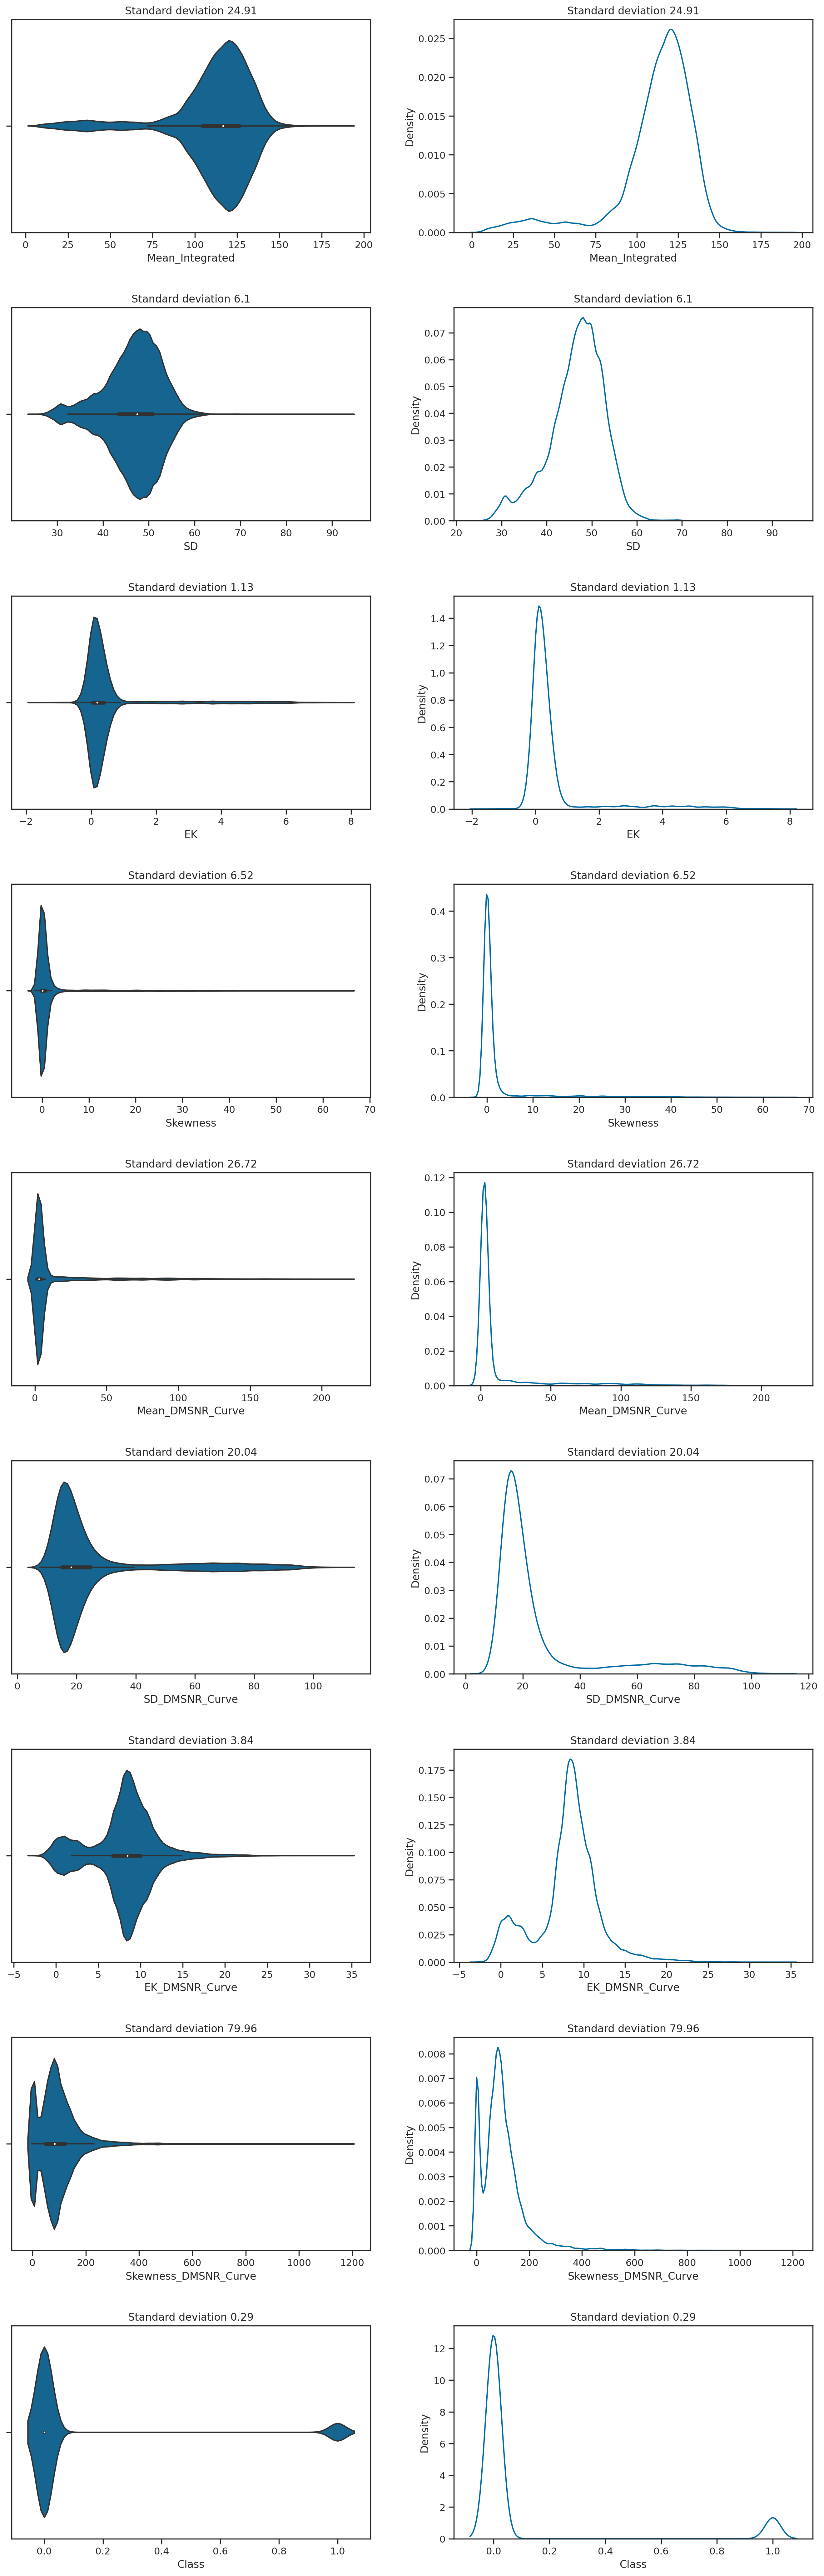

In [18]:
fig, ax = plt.subplots(nrows = len(df_train.columns), ncols = 2, figsize = (14,42))
cols = df_train.columns
cols

for col in range(len(df_train.columns)):
    sns.violinplot(x = df_train.iloc[:, col], ax = ax[col][0])
    ax[col][0].set(xlabel = df_train.columns[col], title = "Standard deviation {0}".format(round(df_train.iloc[:, col].std(), 2)))
    
    sns.kdeplot(data = df_train.iloc[:, col], ax = ax[col][1])
    ax[col][1].set(xlabel = df_train.columns[col], title = "Standard deviation {0}".format(round(df_train.iloc[:, col].std(), 2)))
    
plt.tight_layout(pad = 3)

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, '111.24829978937005')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, '46.713535449299066')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, '0.5034979141093263')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, '1.8863853171290283')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, '11.962921005037567')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, '26.190678331112938')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, '8.03748831196979')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, '93.881075766143')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, '0.09328535946378143')

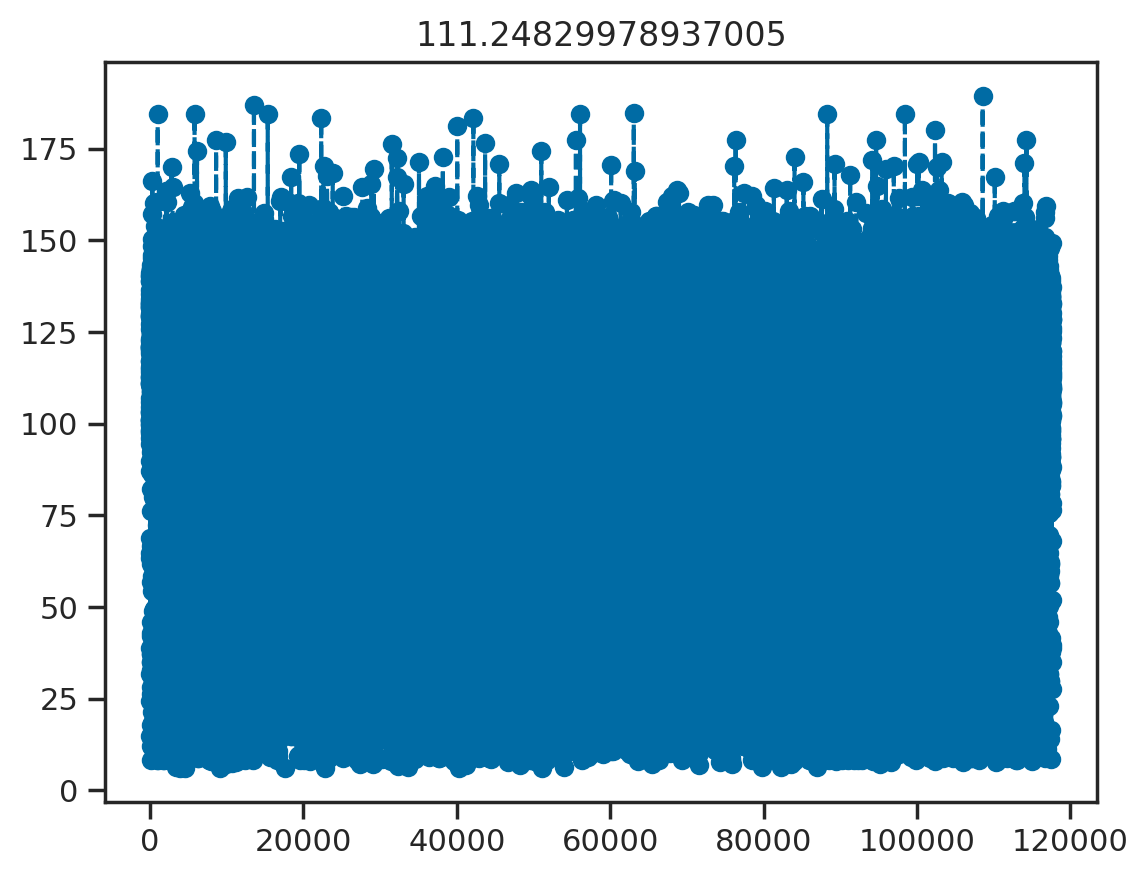

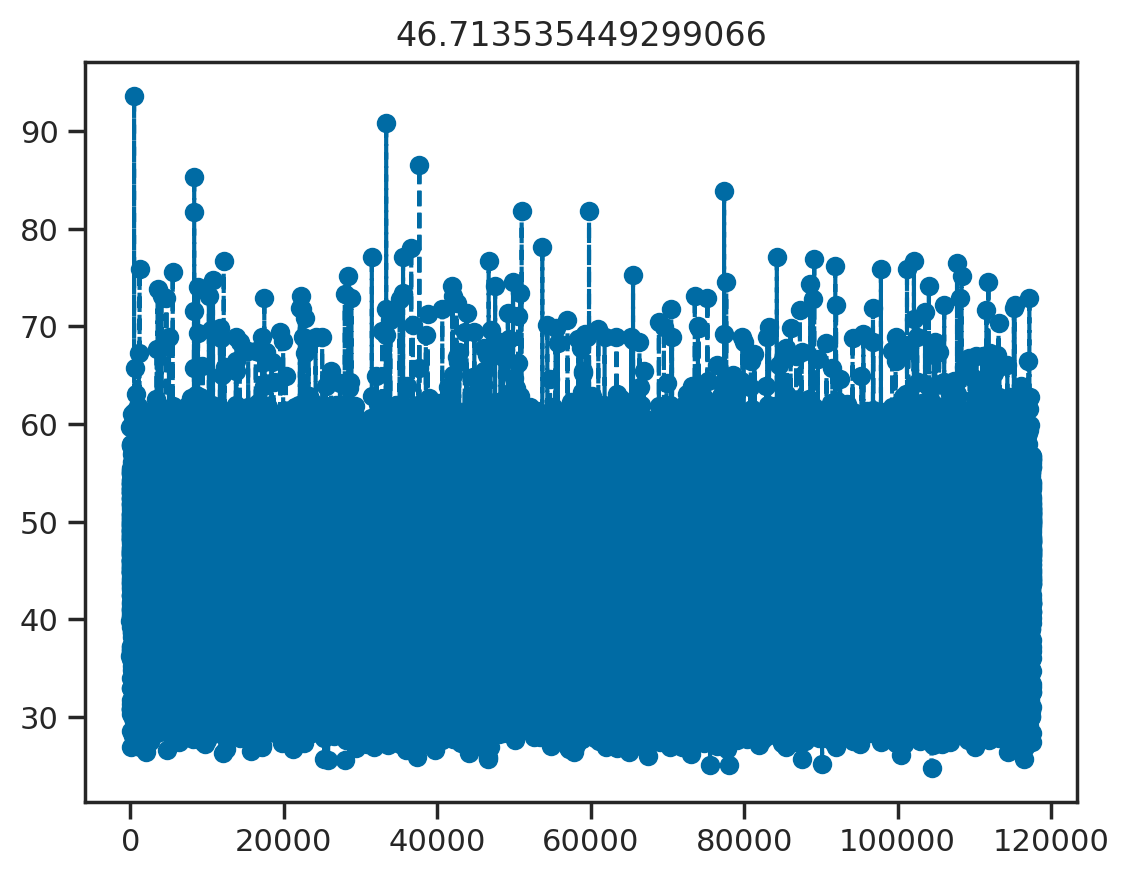

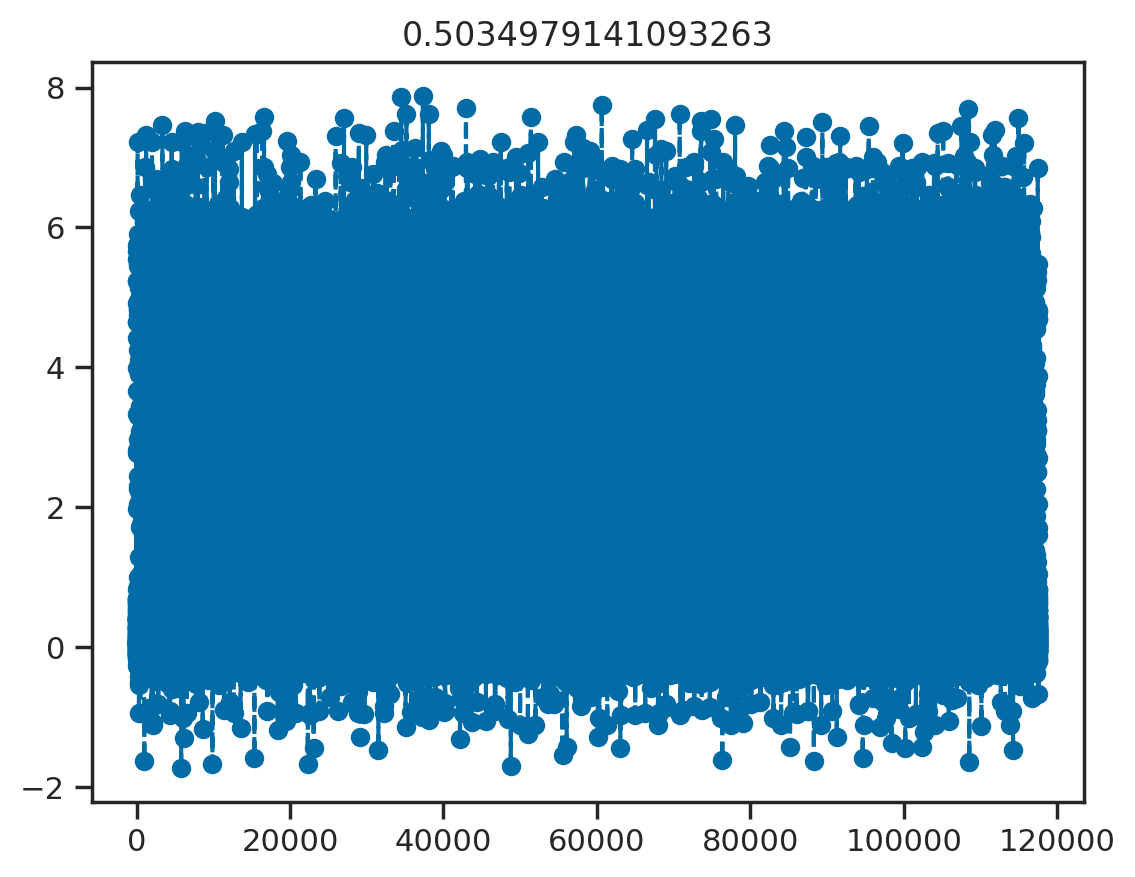

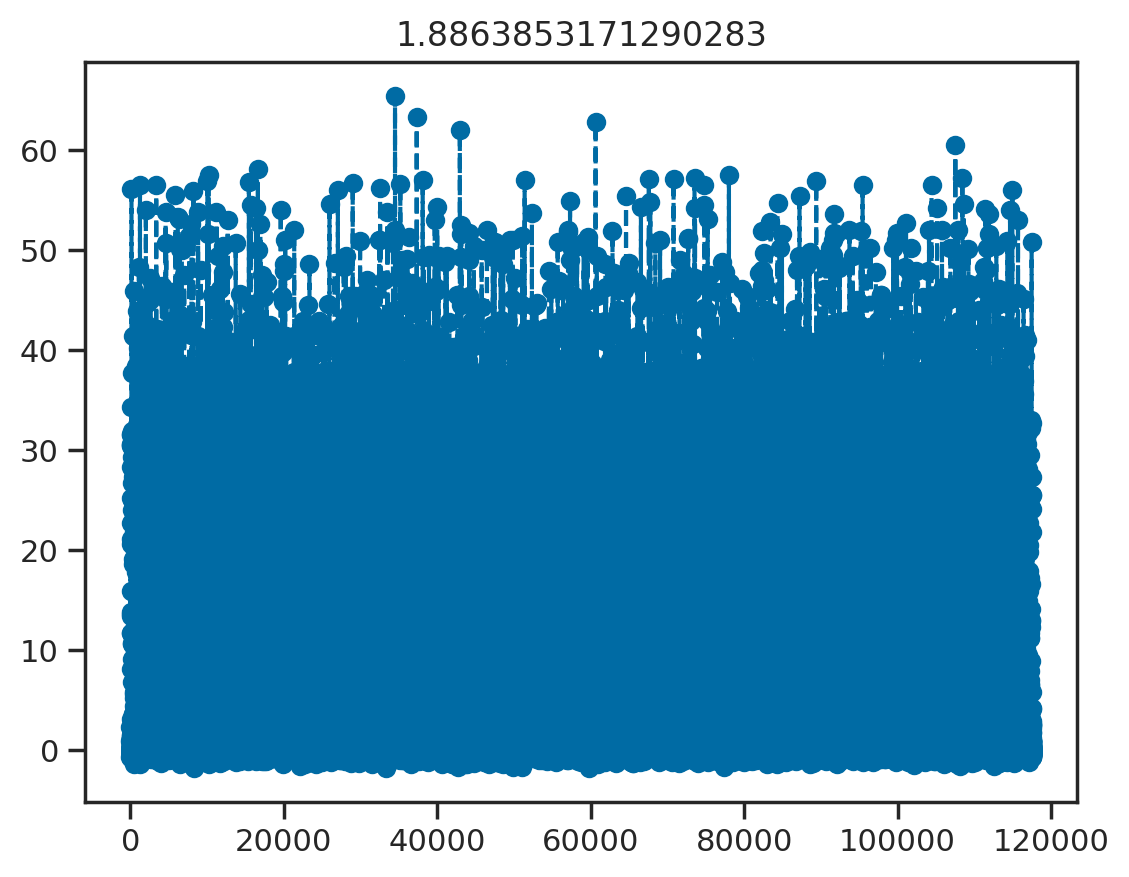

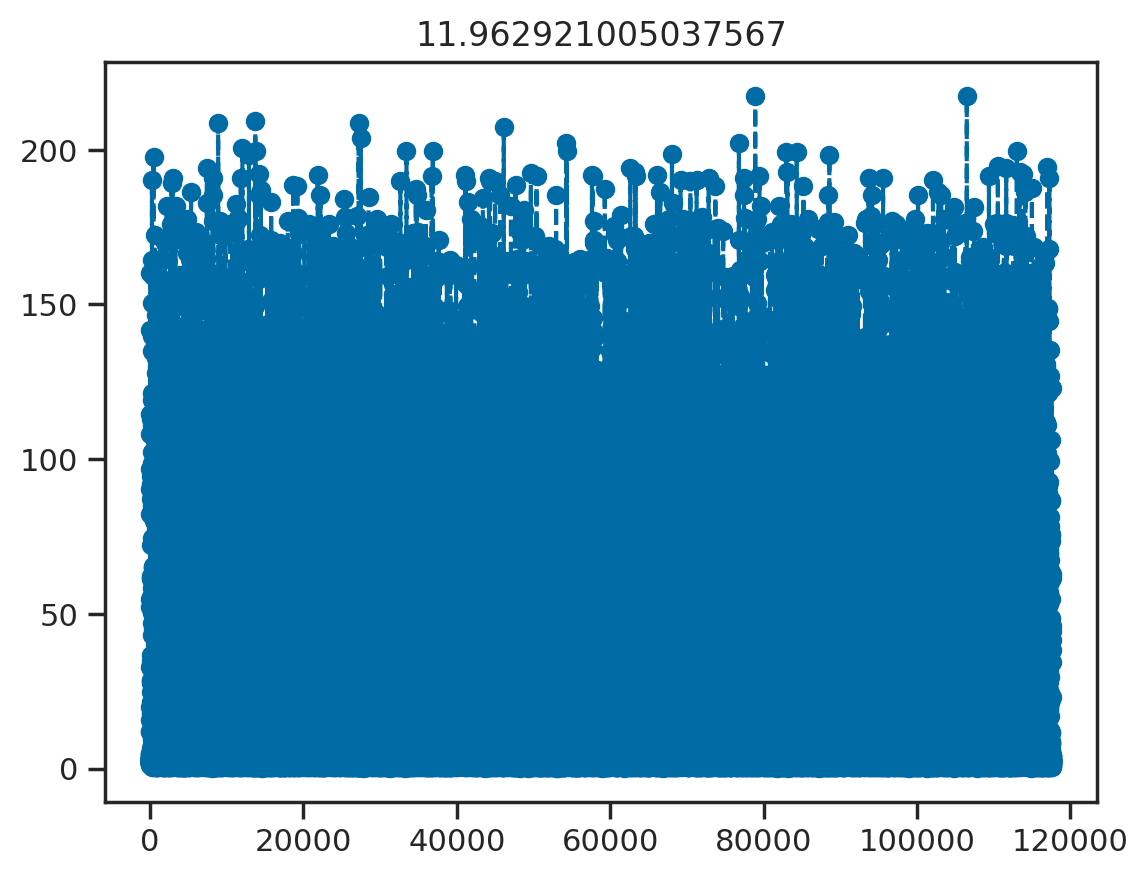

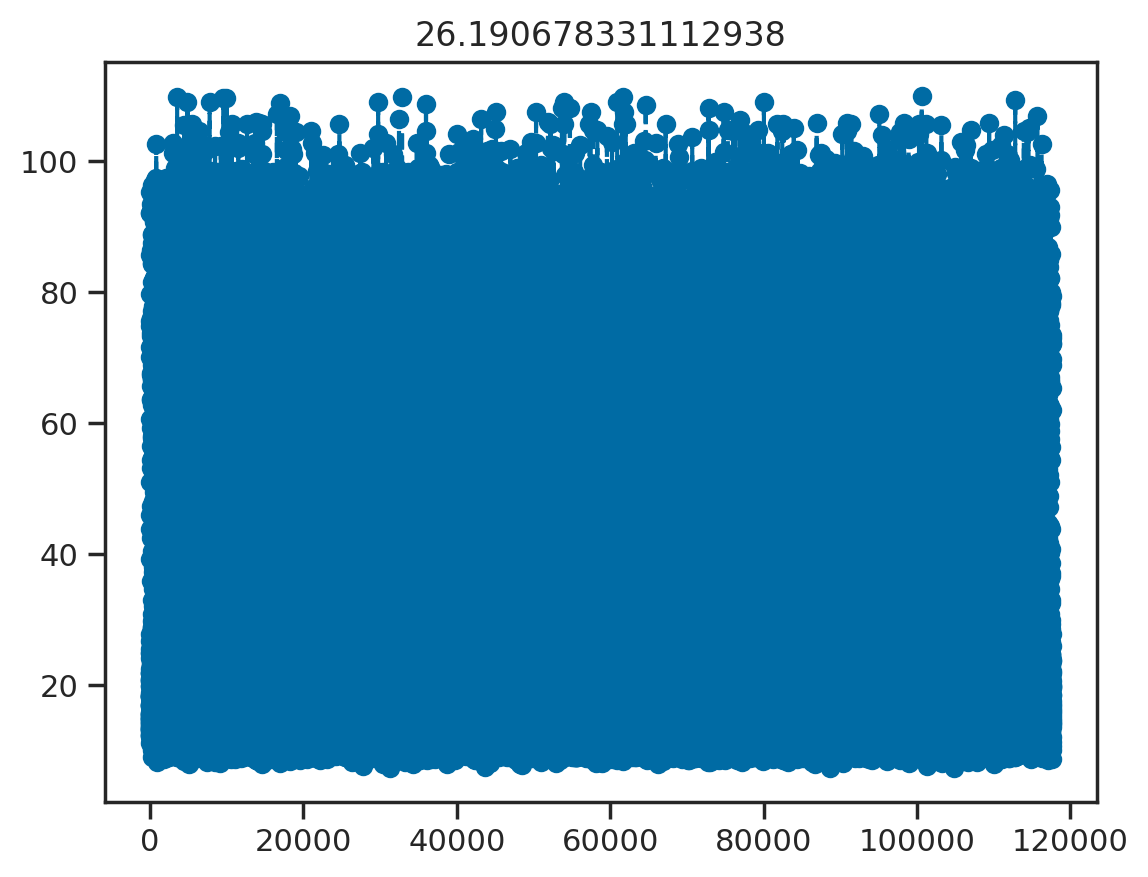

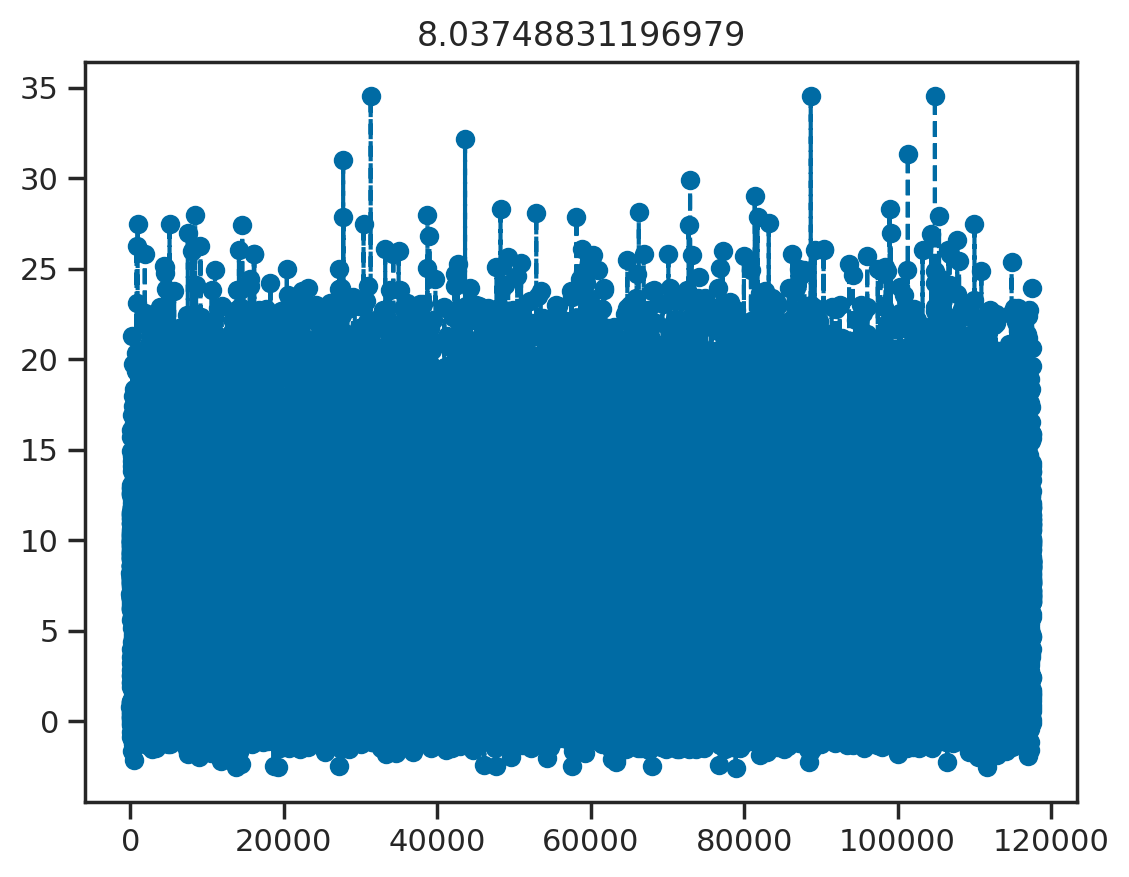

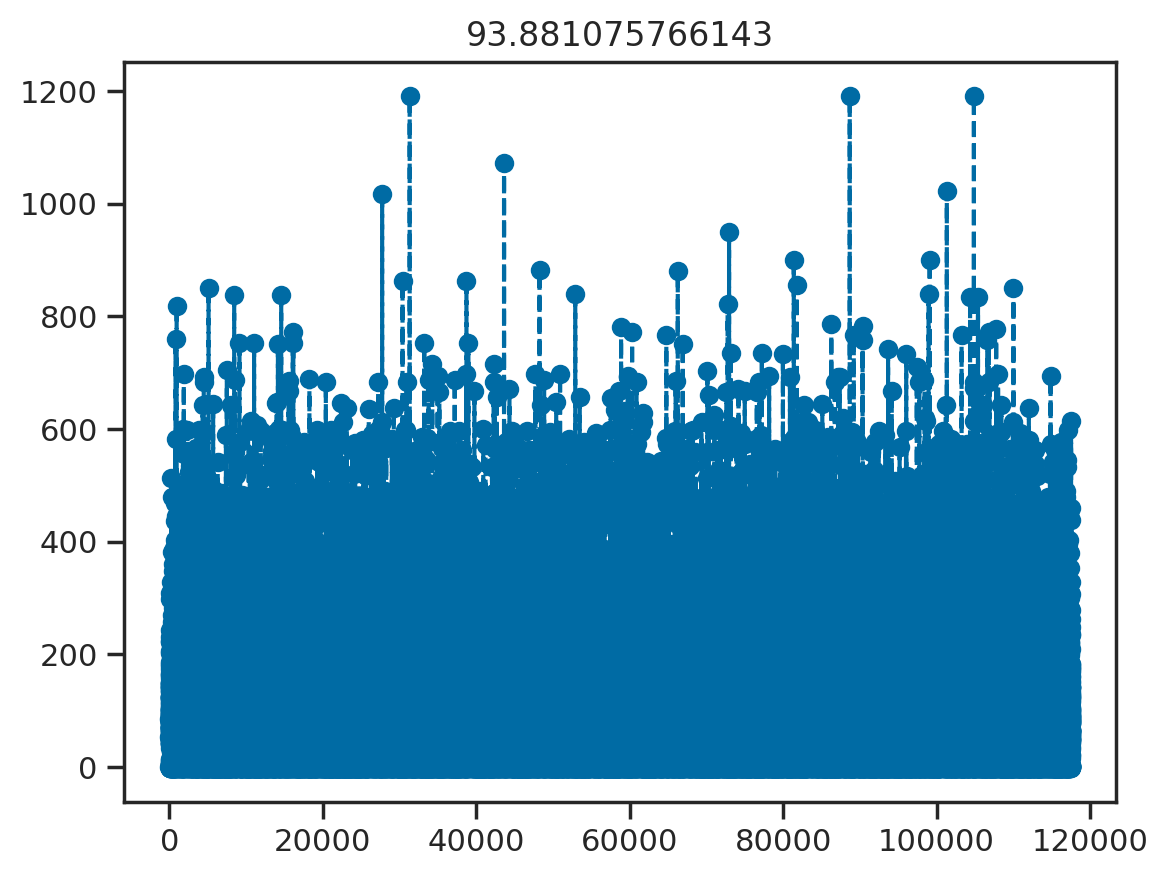

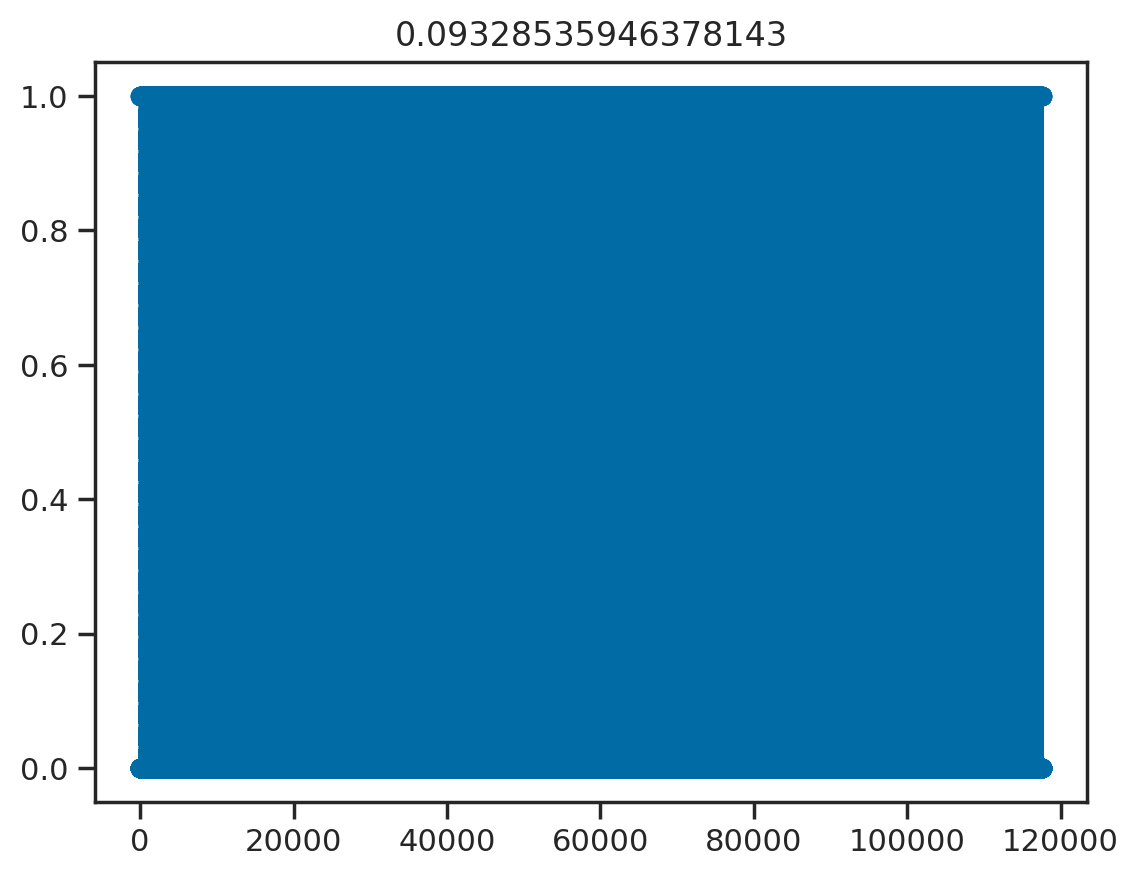

In [19]:
for i in df_train.columns:
    plt.figure()
    plt.plot(df_train[i],'--o')
    plt.title(df_train[i].mean())

### Plotting histogram + KDE with box plots of all the columns

Index(['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='Mean_Integrated', ylabel='Count'>

[Text(0.5, 0, 'Mean_Integrated')]

<AxesSubplot:>

[Text(0.5, 0, 'Mean_Integrated')]

<AxesSubplot:xlabel='SD', ylabel='Count'>

[Text(0.5, 0, 'SD')]

<AxesSubplot:>

[Text(0.5, 0, 'SD')]

<AxesSubplot:xlabel='EK', ylabel='Count'>

[Text(0.5, 0, 'EK')]

<AxesSubplot:>

[Text(0.5, 0, 'EK')]

<AxesSubplot:xlabel='Skewness', ylabel='Count'>

[Text(0.5, 0, 'Skewness')]

<AxesSubplot:>

[Text(0.5, 0, 'Skewness')]

<AxesSubplot:xlabel='Mean_DMSNR_Curve', ylabel='Count'>

[Text(0.5, 0, 'Mean_DMSNR_Curve')]

<AxesSubplot:>

[Text(0.5, 0, 'Mean_DMSNR_Curve')]

<AxesSubplot:xlabel='SD_DMSNR_Curve', ylabel='Count'>

[Text(0.5, 0, 'SD_DMSNR_Curve')]

<AxesSubplot:>

[Text(0.5, 0, 'SD_DMSNR_Curve')]

<AxesSubplot:xlabel='EK_DMSNR_Curve', ylabel='Count'>

[Text(0.5, 0, 'EK_DMSNR_Curve')]

<AxesSubplot:>

[Text(0.5, 0, 'EK_DMSNR_Curve')]

<AxesSubplot:xlabel='Skewness_DMSNR_Curve', ylabel='Count'>

[Text(0.5, 0, 'Skewness_DMSNR_Curve')]

<AxesSubplot:>

[Text(0.5, 0, 'Skewness_DMSNR_Curve')]

<AxesSubplot:xlabel='Class', ylabel='Count'>

[Text(0.5, 0, 'Class')]

<AxesSubplot:>

[Text(0.5, 0, 'Class')]

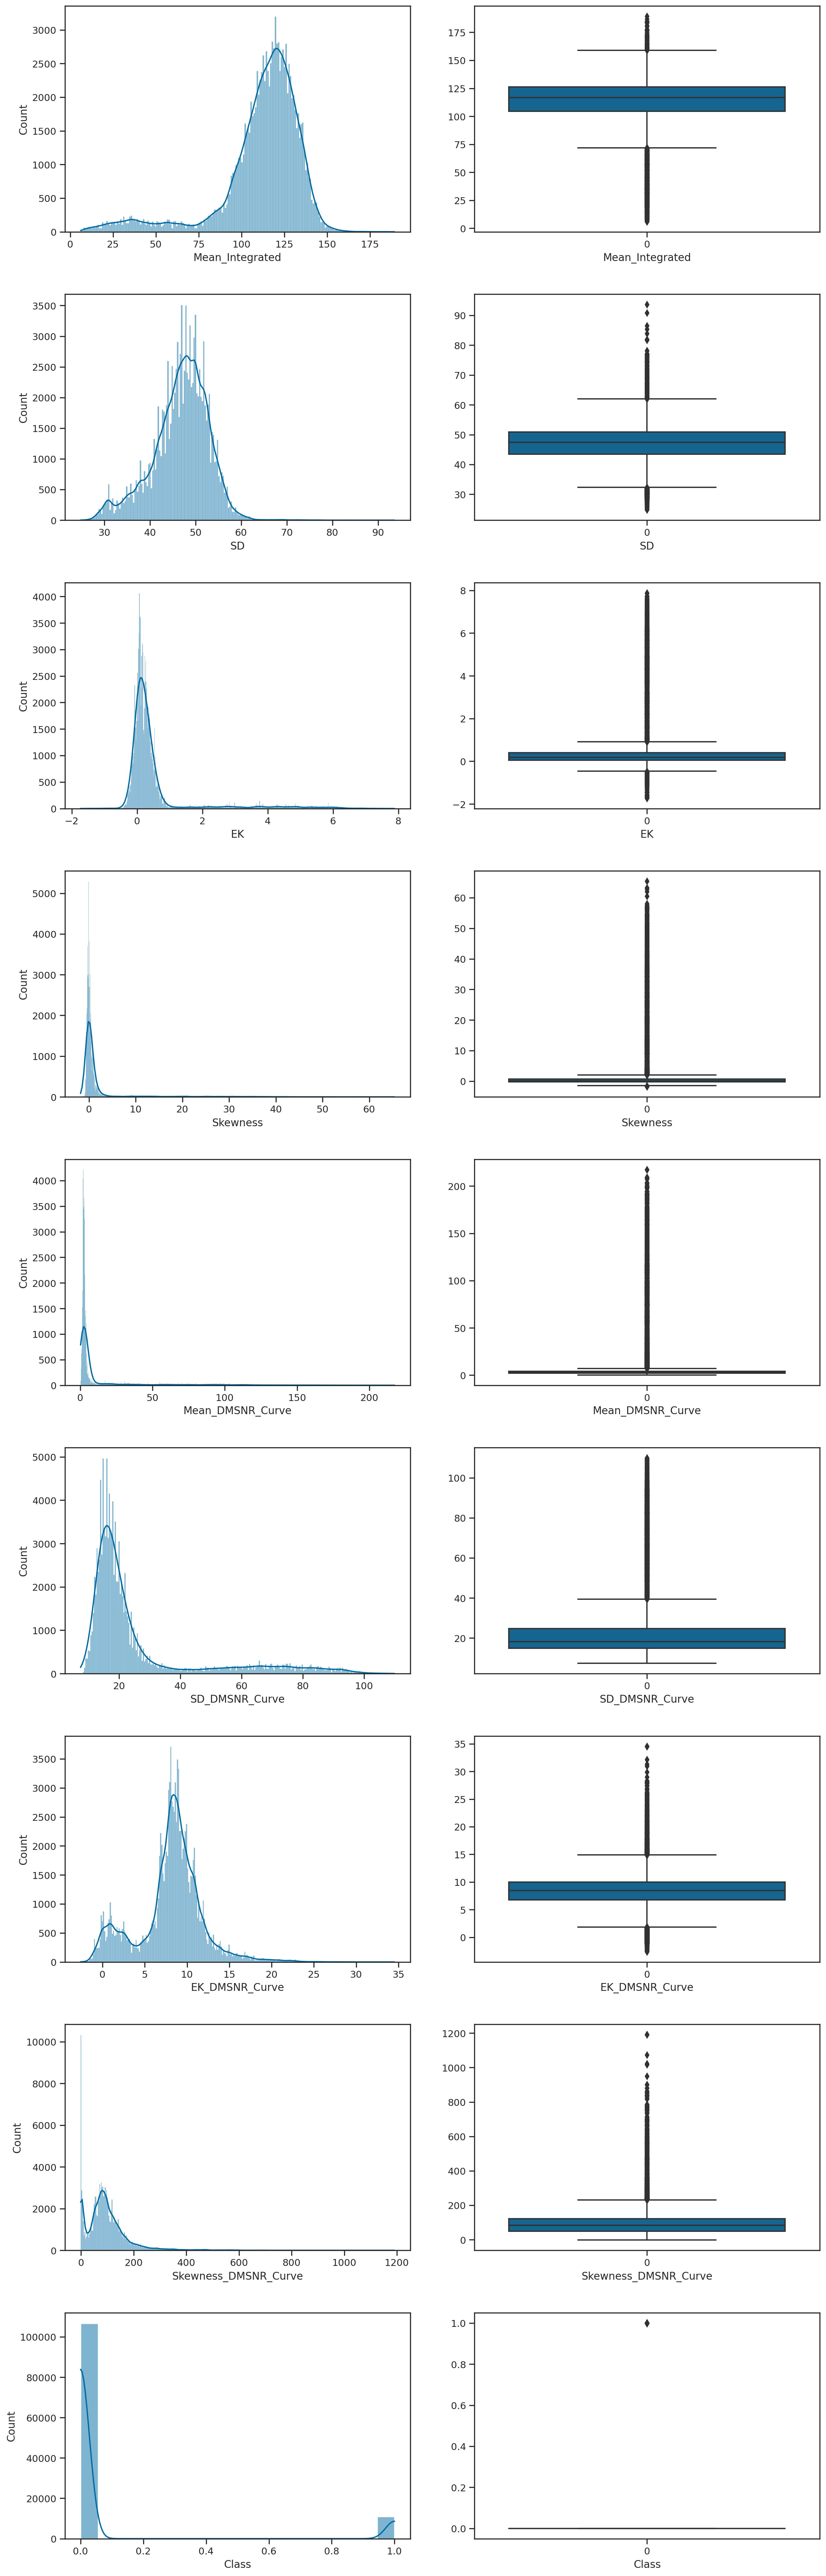

In [20]:
fig, ax = plt.subplots(nrows = len(df_train.columns), ncols = 2, figsize = (14,42))
cols = df_train.columns
cols
for col in range(len(df_train.columns)):
    sns.histplot(data = df_train.iloc[:, col], kde = True, ax = ax[col][0])
    ax[col][0].set(xlabel = df_train.columns[col])
    
    sns.boxplot(data = df_train.iloc[:, col], ax = ax[col][1])
    ax[col][1].set(xlabel = df_train.columns[col])
plt.tight_layout(pad = 3)

### Plotting histogram + KDE with box plots of all the columns along with hue

<AxesSubplot:xlabel='Mean_Integrated', ylabel='Count'>

[Text(0.5, 0, 'Mean_Integrated')]

<AxesSubplot:ylabel='Mean_Integrated'>

[Text(0.5, 0, 'Mean_Integrated')]

<AxesSubplot:xlabel='SD', ylabel='Count'>

[Text(0.5, 0, 'SD')]

<AxesSubplot:ylabel='SD'>

[Text(0.5, 0, 'SD')]

<AxesSubplot:xlabel='EK', ylabel='Count'>

[Text(0.5, 0, 'EK')]

<AxesSubplot:ylabel='EK'>

[Text(0.5, 0, 'EK')]

<AxesSubplot:xlabel='Skewness', ylabel='Count'>

[Text(0.5, 0, 'Skewness')]

<AxesSubplot:ylabel='Skewness'>

[Text(0.5, 0, 'Skewness')]

<AxesSubplot:xlabel='Mean_DMSNR_Curve', ylabel='Count'>

[Text(0.5, 0, 'Mean_DMSNR_Curve')]

<AxesSubplot:ylabel='Mean_DMSNR_Curve'>

[Text(0.5, 0, 'Mean_DMSNR_Curve')]

<AxesSubplot:xlabel='SD_DMSNR_Curve', ylabel='Count'>

[Text(0.5, 0, 'SD_DMSNR_Curve')]

<AxesSubplot:ylabel='SD_DMSNR_Curve'>

[Text(0.5, 0, 'SD_DMSNR_Curve')]

<AxesSubplot:xlabel='EK_DMSNR_Curve', ylabel='Count'>

[Text(0.5, 0, 'EK_DMSNR_Curve')]

<AxesSubplot:ylabel='EK_DMSNR_Curve'>

[Text(0.5, 0, 'EK_DMSNR_Curve')]

<AxesSubplot:xlabel='Skewness_DMSNR_Curve', ylabel='Count'>

[Text(0.5, 0, 'Skewness_DMSNR_Curve')]

<AxesSubplot:ylabel='Skewness_DMSNR_Curve'>

[Text(0.5, 0, 'Skewness_DMSNR_Curve')]

<AxesSubplot:xlabel='Class', ylabel='Count'>

[Text(0.5, 0, 'Class')]

<AxesSubplot:ylabel='Class'>

[Text(0.5, 0, 'Class')]

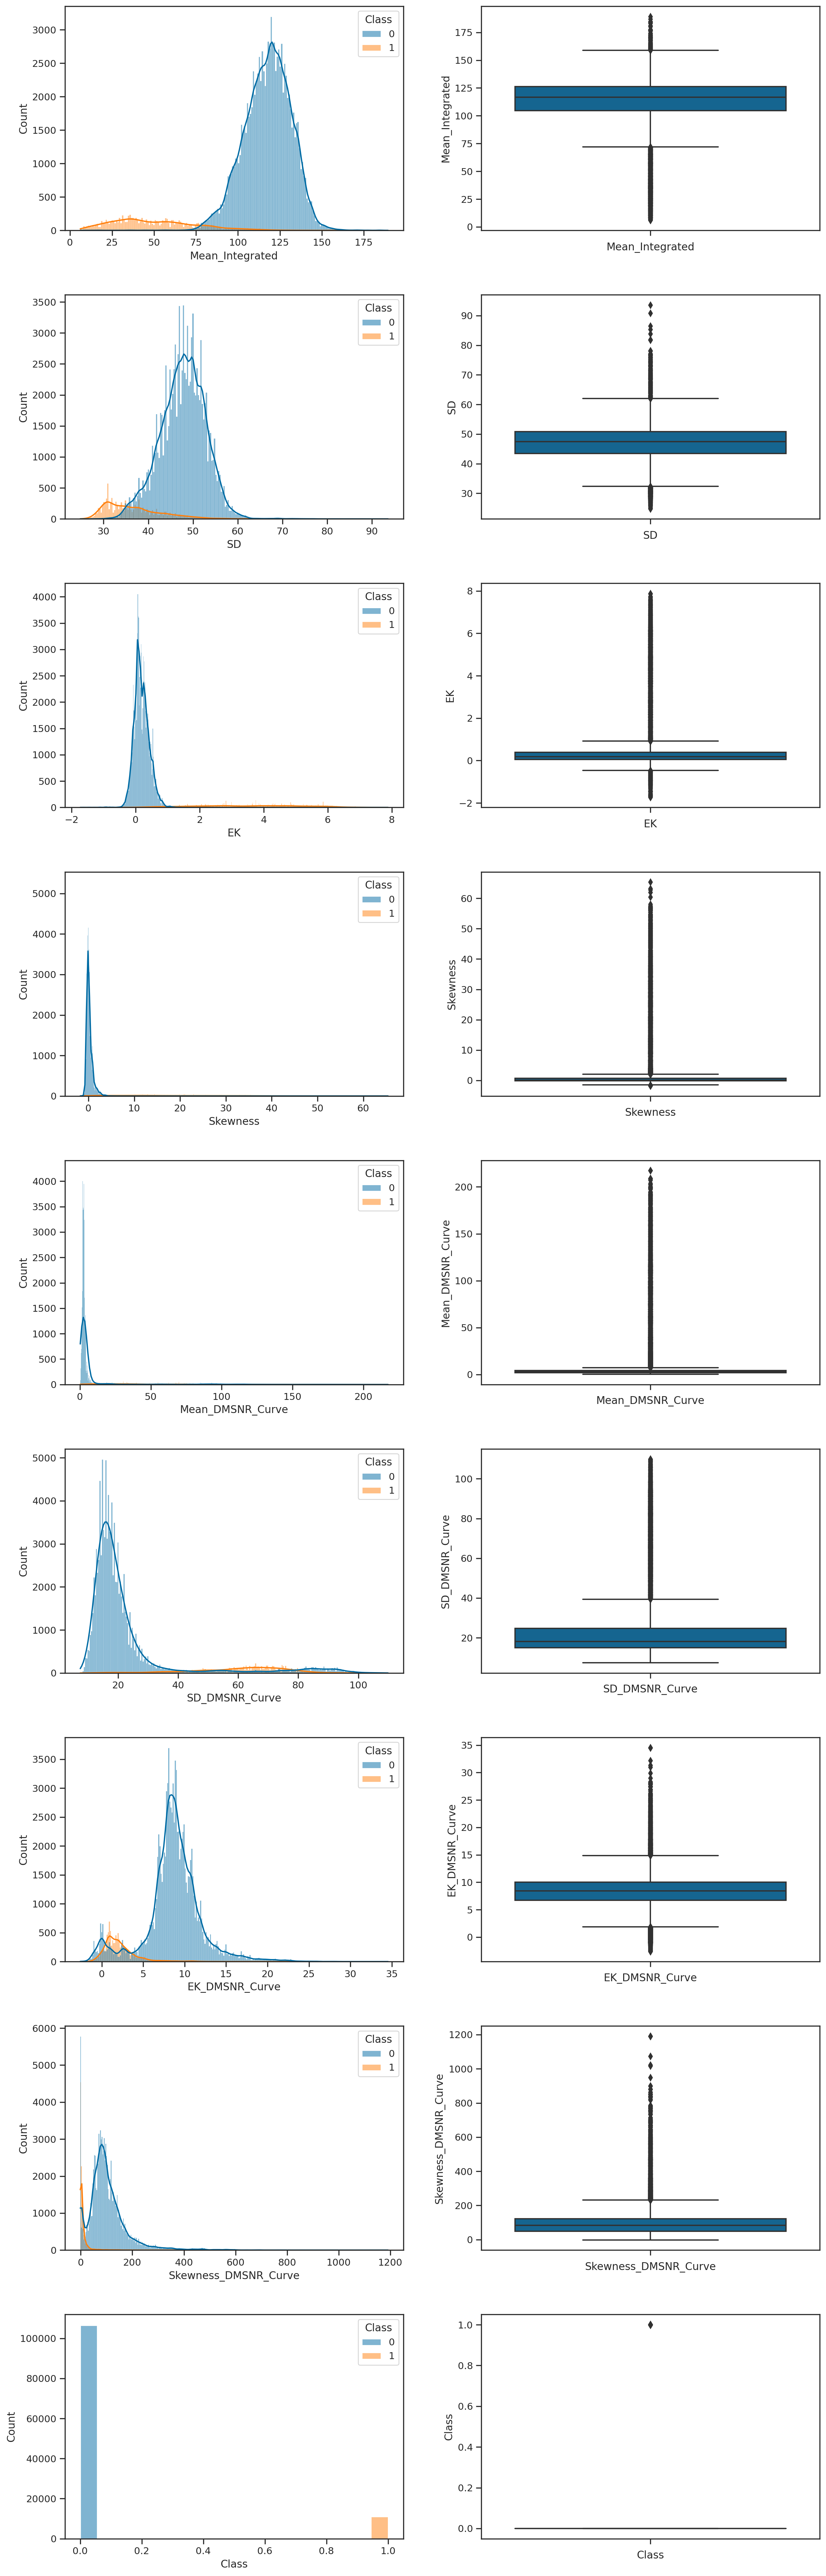

In [21]:
fig, ax = plt.subplots(nrows = len(df_train.columns), ncols = 2, figsize = (14,42))
cols = df_train.columns

for row in range(len(df_train.columns)):
    sns.histplot(data = df_train, x = df_train.iloc[:, row], kde = True, ax = ax[row][0], hue = 'Class')
    ax[row][0].set(xlabel = df_train.columns[row])
    
    sns.boxplot(data = df_train, y = df_train.iloc[:, row], ax = ax[row][1], hue = 'Class')
    ax[row][1].set(xlabel = df_train.columns[row])
    
plt.tight_layout(pad = 3)

In [22]:
df_train.columns 

Index(['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve', 'Class'],
      dtype='object')

### Checking missing/NaN/duplicate values

In [23]:
for i in df_train.columns:
    print("Column -->", i,"\n")
    print("NaN values: ", df_train[i].isnull().sum())
    print("Duplicate values: ", df_train[i].duplicated().sum())
    print("Frequency: ", df_train[i].value_counts())
    print("\n\n")

Column --> Mean_Integrated 

NaN values:  0
Duplicate values:  106499
Frequency:  106.710938    127
120.828125    121
123.828125    113
119.304688    111
114.812500    103
             ... 
31.234375       1
141.789062      1
147.898438      1
55.859375       1
39.687500       1
Name: Mean_Integrated, Length: 11065, dtype: int64



Column --> SD 

NaN values:  0
Duplicate values:  68302
Frequency:  51.829159    73
45.827622    59
54.948689    57
44.955316    54
46.936200    53
             ..
53.454467     1
52.334830     1
46.895458     1
51.717870     1
56.748838     1
Name: SD, Length: 49262, dtype: int64



Column --> EK 

NaN values:  0
Duplicate values:  80432
Frequency:   0.527958    80
 0.262600    68
-0.049364    67
 0.034811    61
 0.339964    57
             ..
 0.199479     1
 0.167828     1
 0.106098     1
-0.172512     1
 0.441426     1
Name: EK, Length: 37132, dtype: int64



Column --> Skewness 

NaN values:  0
Duplicate values:  76198
Frequency:  -0.374935     83
 0.09

#### Observations
- It's great that we do not have any NaNs in any column.
- We have lot of duplicate values which is obvious in numeric columns.

In [24]:
# sns.pairplot(df_train, hue = 'Class')

#### Observations
- EK_DMSNR_Curve and Skeweness_DMSNR_Curve have awesome correlation
- We can see a clear separable boundary (in most of the graphs) that can be drawn as the points are nicely clustered according to class column. 
    - We could learn an SVM (good algo for linearly separable data, decision trees (for straight boundaries), kNN too.
- The points are nicely linearly separable in 2-D. But in higher dimension we are not sure how it looks like.

In [25]:
# sns.pairplot(df_train)

## Modelling

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score

### Without Normalization/Standardization

In [27]:
df_train

Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0            133.171875  59.716081  0.043133 -0.703383         54.917224   
1             87.093750  36.257973  0.435469  2.266057          3.417224   
2            112.640625  39.818393  0.379639  0.922306          2.730769   
3            120.679688  45.918448 -0.098490  0.011775          2.696488   
4            134.070312  57.720107 -0.107772 -0.573335          1.107860   
...                 ...        ...       ...       ...               ...   
117559       132.843750  56.748838 -0.060070 -0.554084          4.054348   
117560       112.578125  52.539271  0.179580 -0.306961          1.637960   
117561       119.757812  49.980013  0.064402 -0.270822          3.877926   
117562       105.789062  46.986595  0.441426  0.372466          2.097826   
117563       113.515625  50.935956  0.031517 -0.443831         23.290970   

        SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0            70.084438        0.749798             -0.649512      0  
1            21.865069        7.039330             52.686251      0  
2            15.689690        8.193471             85.649785      0  
3            20.954662        8.183874             70.332899      0  
4            11.255051       16.107748            308.753765      0  
...                ...             ...                   ...    ...  
117559       27.844144        6.564423             44.442664      0  
117560       15.331913       11.384718            142.535470      0  
117561       19.788559        6.959740             56.367789      0  
117562       17.170612        9.442445             99.074539      0  
117563       62.006842        2.386364              4.001859      0  

[117564 rows x 9 columns]

In [28]:
X, y = df_train.iloc[:,:-1], df_train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y)

In [29]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train,y_train)
clf_tree.score(X_test,y_test)

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)
clf_knn.score(X_test,y_test)

clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
clf_gnb.score(X_test,y_test)

clf_svm = SVC()
clf_svm.fit(X_train,y_train)
clf_svm.score(X_test,y_test)

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)
clf_rf.score(X_test,y_test)

clf_boost = AdaBoostClassifier()
clf_boost.fit(X_train,y_train)
clf_boost.score(X_test,y_test)

clf_bag = BaggingClassifier()
clf_bag.fit(X_train,y_train)
clf_bag.score(X_test,y_test)

clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train, y_train)
clf_gb.score(X_test, y_test)

DecisionTreeClassifier()

0.9844341428146132

KNeighborsClassifier()

0.987836515969889

GaussianNB()

0.9637221962318717

SVC()

0.987836515969889

RandomForestClassifier()

0.9897078212052907

AdaBoostClassifier()

0.9888146982520308

BaggingClassifier()

0.989410113554204

GradientBoostingClassifier()

0.9897928805341726

In [30]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e10/test.csv')
df_test.head()

id  Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0  117564       140.046875  54.507800  0.058862 -0.567263          2.337793   
1  117565       107.828125  51.578965  0.284368 -0.338430          1.574415   
2  117566       135.062500  49.812343 -0.087784 -0.094341          3.576923   
3  117567       112.812500  41.926647  0.519921  1.287762          6.669732   
4  117568        96.210938  35.322620  0.481286  2.443080          2.218227   

   SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  
0       14.868335        9.591760            117.988781  
1       12.501437       11.694968            182.704822  
2       21.243336        7.252386             59.021499  
3       29.013153        5.097661             27.105240  
4       17.041064        9.766006            117.131775

In [31]:
df_test.drop(columns = ['id'], inplace = True)

In [32]:
# Uding Cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [33]:
print("Model performance on various algorithms")
print("-------------------")
clf_tree_cv = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
print("Decision tree",round(np.mean(clf_tree_cv), 4) * 100,"%")
print()

clf_knn_cv = cross_val_score(KNeighborsClassifier(), X, y, cv=5)
print("kNN",round(np.mean(clf_knn_cv), 4) * 100,"%")
print()

clf_gnb_cv = cross_val_score(GaussianNB(), X, y, cv=5)
print("GNB",round(np.mean(clf_gnb_cv), 4) * 100,"%")
print()

clf_svm_cv = cross_val_score(SVC(), X, y, cv=5)
print("SVM",round(np.mean(clf_svm_cv), 4) * 100,"%")
print()

clf_rf_cv = cross_val_score(RandomForestClassifier() , X, y, cv=5)
print("Random forests",round(np.mean(clf_rf_cv), 4) * 100,"%")
print()

clf_bag_cv = cross_val_score(BaggingClassifier() , X, y, cv=5)
print("Bagging",round(np.mean(clf_bag_cv), 4) * 100,"%")
print()

clf_boost_cv = cross_val_score(AdaBoostClassifier() , X, y, cv=5)
print("Ada Boost",round(np.mean(clf_boost_cv), 4) * 100,"%")
print()

clf_grad_boost_cv = cross_val_score(GradientBoostingClassifier() , X, y, cv=5)
print("Gradient Boosting",round(np.mean(clf_grad_boost_cv), 4) * 100,"%")
print()

Model performance on various algorithms
-------------------
Decision tree 98.5 %

kNN 98.8 %

GNB 96.19 %

SVM 98.83 %

Random forests 99.07000000000001 %

Bagging 99.00999999999999 %

Ada Boost 98.98 %

Gradient Boosting 99.07000000000001 %



In [34]:
scores = pd.DataFrame({
                        "Plain - CV": [
                                  round(np.mean(clf_tree_cv), 4) * 100,
                                  round(np.mean(clf_knn_cv), 4) * 100,
                                  round(np.mean(clf_gnb_cv), 4) * 100,
                                  round(np.mean(clf_svm_cv), 4) * 100,
                                  round(np.mean(clf_rf_cv), 4) * 100,
                                  round(np.mean(clf_bag_cv), 4) * 100,
                                  round(np.mean(clf_boost_cv), 4) * 100,
                                  round(np.mean(clf_grad_boost_cv), 4) * 100
                                 ],
                        "Plain - train-test-split": [
                              round(clf_tree.score(X_test, y_test), 4) * 100,
                              round(clf_knn.score(X_test, y_test), 4) * 100,
                              round(clf_gnb.score(X_test, y_test), 4) * 100,
                              round(clf_svm.score(X_test, y_test), 4) * 100,
                              round(clf_rf.score(X_test, y_test), 4) * 100,
                              round(clf_bag.score(X_test, y_test), 4) * 100,
                              round(clf_boost.score(X_test, y_test), 4) * 100,
                              round(clf_gb.score(X_test, y_test), 4) * 100,
                             ]
                        },
                        index = ["Decision Tree", "kNN", "GNB", "SVM" , "Random forests", "Bagging", "Ada Boost", "Gradient Boosting"] )
scores

Plain - CV  Plain - train-test-split
Decision Tree           98.50                     98.44
kNN                     98.80                     98.78
GNB                     96.19                     96.37
SVM                     98.83                     98.78
Random forests          99.07                     98.97
Bagging                 99.01                     98.94
Ada Boost               98.98                     98.88
Gradient Boosting       99.07                     98.98

In [35]:
clf_rf.feature_importances_

array([0.25592793, 0.03209715, 0.25159234, 0.24724546, 0.03805215,
       0.10313928, 0.04935945, 0.02258625])

<AxesSubplot:>

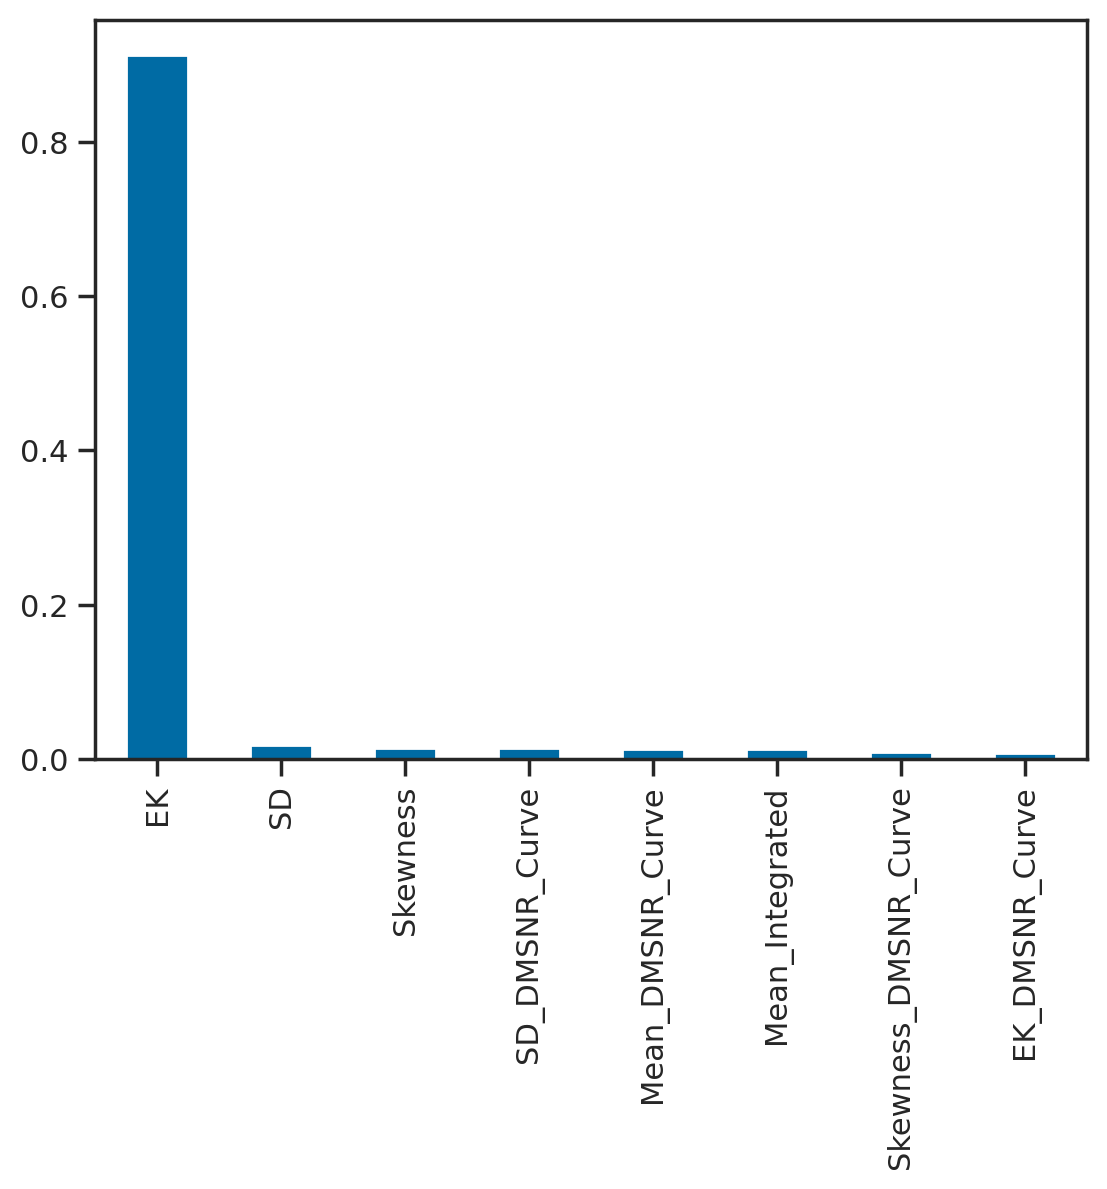

In [36]:
pd.Series(data = clf_tree.feature_importances_, index=df_train.columns[:-1]).sort_values(ascending=False)[:14].plot.bar()

In [37]:
px.bar(pd.Series(data = clf_tree.feature_importances_, 
                 index = df_train.columns[:-1]).sort_values(ascending=False)[:14],
                  text_auto = True)

In [38]:
px.bar(pd.Series(data = clf_rf.feature_importances_, 
                 index = df_train.columns[:-1]).sort_values(ascending=False)[:14],
                  text_auto = True)

In [39]:
px.bar(pd.Series(data = clf_gb.feature_importances_, 
                 index = df_train.columns[:-1]).sort_values(ascending=False)[:14],
                  text_auto = True)

In [40]:
df_sample = pd.read_csv('/kaggle/input/playground-series-s3e10/sample_submission.csv')
df_sample

id  Class
0      117564    0.5
1      117565    0.5
2      117566    0.5
3      117567    0.5
4      117568    0.5
...       ...    ...
78372  195936    0.5
78373  195937    0.5
78374  195938    0.5
78375  195939    0.5
78376  195940    0.5

[78377 rows x 2 columns]

### With normalization

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
df_train_normalized = df_train.copy()
df_train_normalized

Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0            133.171875  59.716081  0.043133 -0.703383         54.917224   
1             87.093750  36.257973  0.435469  2.266057          3.417224   
2            112.640625  39.818393  0.379639  0.922306          2.730769   
3            120.679688  45.918448 -0.098490  0.011775          2.696488   
4            134.070312  57.720107 -0.107772 -0.573335          1.107860   
...                 ...        ...       ...       ...               ...   
117559       132.843750  56.748838 -0.060070 -0.554084          4.054348   
117560       112.578125  52.539271  0.179580 -0.306961          1.637960   
117561       119.757812  49.980013  0.064402 -0.270822          3.877926   
117562       105.789062  46.986595  0.441426  0.372466          2.097826   
117563       113.515625  50.935956  0.031517 -0.443831         23.290970   

        SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0            70.084438        0.749798             -0.649512      0  
1            21.865069        7.039330             52.686251      0  
2            15.689690        8.193471             85.649785      0  
3            20.954662        8.183874             70.332899      0  
4            11.255051       16.107748            308.753765      0  
...                ...             ...                   ...    ...  
117559       27.844144        6.564423             44.442664      0  
117560       15.331913       11.384718            142.535470      0  
117561       19.788559        6.959740             56.367789      0  
117562       17.170612        9.442445             99.074539      0  
117563       62.006842        2.386364              4.001859      0  

[117564 rows x 9 columns]

In [43]:
df_train_normalized = MinMaxScaler().fit_transform(df_train_normalized)
df_train_normalized

array([[0.69344528, 0.50759926, 0.18458263, ..., 0.09014205, 0.00111273,
        0.        ],
       [0.44208149, 0.16673579, 0.2254067 , ..., 0.25949905, 0.04582082,
        0.        ],
       [0.58144391, 0.2184713 , 0.21959735, ..., 0.29057637, 0.07345213,
        0.        ],
       ...,
       [0.62026935, 0.36612706, 0.18679571, ..., 0.25735594, 0.04890683,
        0.        ],
       [0.54406751, 0.32263051, 0.22602661, ..., 0.32420725, 0.08470528,
        0.        ],
       [0.58621718, 0.38001761, 0.18337392, ..., 0.13420955, 0.00501169,
        0.        ]])

In [44]:
df_train_normalized = pd.DataFrame(df_train_normalized)

In [45]:
df_train_normalized.columns = df_train.columns 
df_train_normalized

Mean_Integrated        SD        EK  Skewness  Mean_DMSNR_Curve  \
0              0.693445  0.507599  0.184583  0.016203          0.251909   
1              0.442081  0.166736  0.225407  0.060406          0.014754   
2              0.581444  0.218471  0.219597  0.040403          0.011593   
3              0.625298  0.307110  0.169846  0.026849          0.011435   
4              0.698346  0.478596  0.168880  0.018139          0.004120   
...                 ...       ...       ...       ...               ...   
117559         0.691655  0.464483  0.173844  0.018426          0.017688   
117560         0.581103  0.403315  0.198780  0.022104          0.006561   
117561         0.620269  0.366127  0.186796  0.022642          0.016876   
117562         0.544068  0.322631  0.226027  0.032218          0.008679   
117563         0.586217  0.380018  0.183374  0.020067          0.106272   

        SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0             0.611722        0.090142              0.001113    0.0  
1             0.141383        0.259499              0.045821    0.0  
2             0.081147        0.290576              0.073452    0.0  
3             0.132503        0.290318              0.060613    0.0  
4             0.037891        0.503683              0.260466    0.0  
...                ...             ...                   ...    ...  
117559        0.199704        0.246711              0.038911    0.0  
117560        0.077658        0.376506              0.121136    0.0  
117561        0.121128        0.257356              0.048907    0.0  
117562        0.095593        0.324207              0.084705    0.0  
117563        0.532932        0.134210              0.005012    0.0  

[117564 rows x 9 columns]

<AxesSubplot:xlabel='Mean_Integrated', ylabel='Count'>

[Text(0.5, 0, 'Mean_Integrated')]

<AxesSubplot:ylabel='Mean_Integrated'>

[Text(0.5, 0, 'Mean_Integrated')]

<AxesSubplot:xlabel='SD', ylabel='Count'>

[Text(0.5, 0, 'SD')]

<AxesSubplot:ylabel='SD'>

[Text(0.5, 0, 'SD')]

<AxesSubplot:xlabel='EK', ylabel='Count'>

[Text(0.5, 0, 'EK')]

<AxesSubplot:ylabel='EK'>

[Text(0.5, 0, 'EK')]

<AxesSubplot:xlabel='Skewness', ylabel='Count'>

[Text(0.5, 0, 'Skewness')]

<AxesSubplot:ylabel='Skewness'>

[Text(0.5, 0, 'Skewness')]

<AxesSubplot:xlabel='Mean_DMSNR_Curve', ylabel='Count'>

[Text(0.5, 0, 'Mean_DMSNR_Curve')]

<AxesSubplot:ylabel='Mean_DMSNR_Curve'>

[Text(0.5, 0, 'Mean_DMSNR_Curve')]

<AxesSubplot:xlabel='SD_DMSNR_Curve', ylabel='Count'>

[Text(0.5, 0, 'SD_DMSNR_Curve')]

<AxesSubplot:ylabel='SD_DMSNR_Curve'>

[Text(0.5, 0, 'SD_DMSNR_Curve')]

<AxesSubplot:xlabel='EK_DMSNR_Curve', ylabel='Count'>

[Text(0.5, 0, 'EK_DMSNR_Curve')]

<AxesSubplot:ylabel='EK_DMSNR_Curve'>

[Text(0.5, 0, 'EK_DMSNR_Curve')]

<AxesSubplot:xlabel='Skewness_DMSNR_Curve', ylabel='Count'>

[Text(0.5, 0, 'Skewness_DMSNR_Curve')]

<AxesSubplot:ylabel='Skewness_DMSNR_Curve'>

[Text(0.5, 0, 'Skewness_DMSNR_Curve')]

<AxesSubplot:xlabel='Class', ylabel='Count'>

[Text(0.5, 0, 'Class')]

<AxesSubplot:ylabel='Class'>

[Text(0.5, 0, 'Class')]

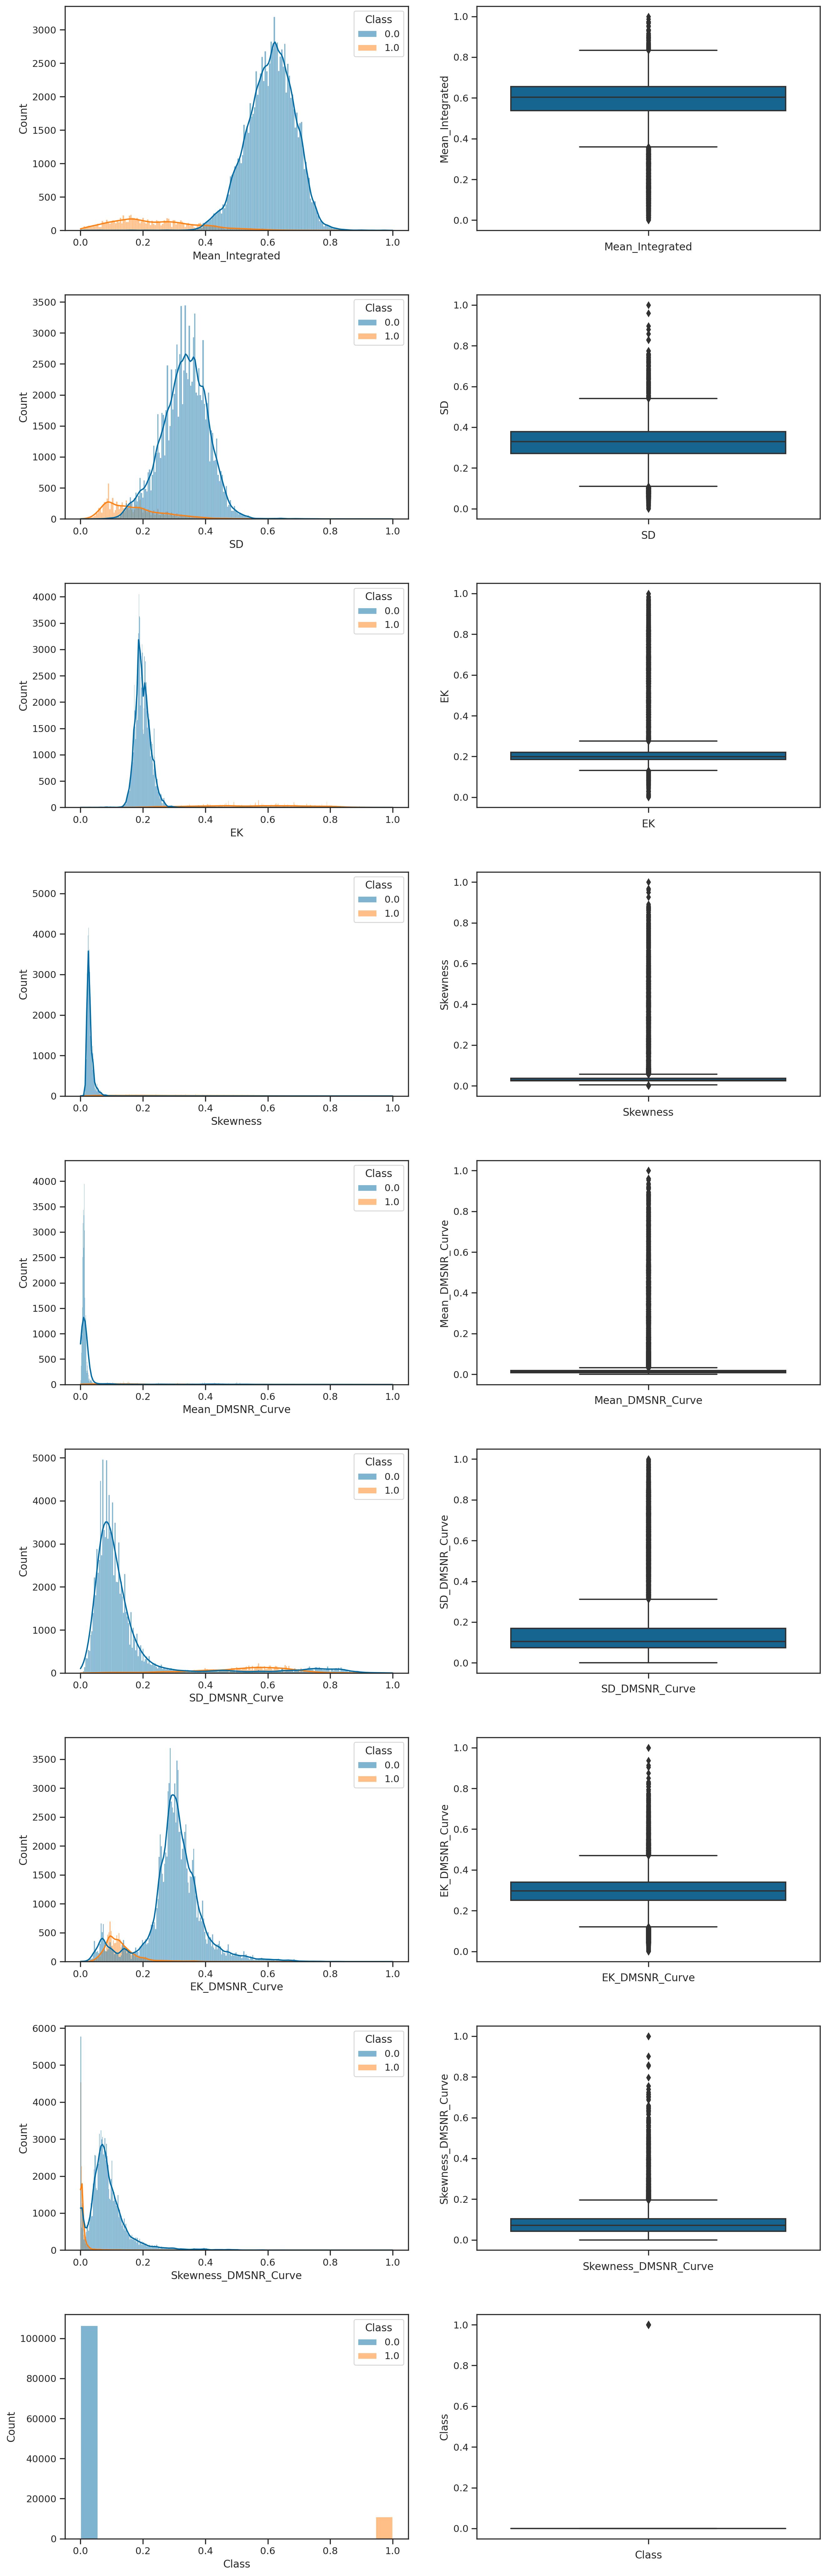

In [46]:
# Plotting the graphs

fig, ax = plt.subplots(nrows = len(df_train_normalized.columns), ncols = 2, figsize = (14,42))
# cols = df_train.columns

for row in range(len(df_train_normalized.columns)):
    sns.histplot(data = df_train_normalized, x = df_train_normalized.iloc[:, row], kde = True, ax = ax[row][0], hue = 'Class')
    ax[row][0].set(xlabel = df_train_normalized.columns[row])
    
    sns.boxplot(data = df_train_normalized, y = df_train_normalized.iloc[:, row], ax = ax[row][1], hue = 'Class')
    ax[row][1].set(xlabel = df_train_normalized.columns[row])
    
plt.tight_layout(pad = 3)

In [47]:
X_normalized, y_normalized = df_train_normalized.iloc[:,:-1], df_train_normalized.iloc[:,-1]
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(X_normalized, y_normalized, train_size = 0.8, stratify = y_normalized)

In [48]:
clf_tree_normalized = DecisionTreeClassifier()
clf_tree_normalized.fit(X_train_normalized, y_train_normalized)
clf_tree_normalized.score(X_test_normalized, y_test_normalized)

clf_knn_normalized = KNeighborsClassifier()
clf_knn_normalized.fit(X_train_normalized, y_train_normalized)
clf_knn_normalized.score(X_test_normalized, y_test_normalized)

clf_gnb_normalized = GaussianNB()
clf_gnb_normalized.fit(X_train_normalized, y_train_normalized)
clf_gnb_normalized.score(X_test_normalized, y_test_normalized)

clf_svm_normalized = SVC()
clf_svm_normalized.fit(X_train_normalized, y_train_normalized)
clf_svm_normalized.score(X_test_normalized, y_test_normalized)

clf_rf_normalized = RandomForestClassifier()
clf_rf_normalized.fit(X_train_normalized, y_train_normalized)
clf_rf_normalized.score(X_test_normalized, y_test_normalized)

clf_boost_normalized = AdaBoostClassifier()
clf_boost_normalized.fit(X_train_normalized, y_train_normalized)
clf_boost_normalized.score(X_test_normalized, y_test_normalized)

clf_bag_normalized = BaggingClassifier()
clf_bag_normalized.fit(X_train_normalized, y_train_normalized)
clf_bag_normalized.score(X_test_normalized, y_test_normalized)

clf_gb_normalized = GradientBoostingClassifier()
clf_gb_normalized.fit(X_train_normalized, y_train_normalized)
clf_gb_normalized.score(X_test_normalized, y_test_normalized)

DecisionTreeClassifier()

0.9854973844256368

KNeighborsClassifier()

0.9900480585208182

GaussianNB()

0.9615531833453834

SVC()

0.990260706843023

RandomForestClassifier()

0.9909411814740782

AdaBoostClassifier()

0.990260706843023

BaggingClassifier()

0.9908135924807553

GradientBoostingClassifier()

0.9908561221451962

In [49]:
print("Model performance on various algorithms")
print("---------------------------------------")

clf_tree_cv_normalized = cross_val_score(DecisionTreeClassifier(), X_normalized, y_normalized, cv=5)
print("Decision tree",round(np.mean(clf_tree_cv_normalized), 4) * 100,"%")
print()

clf_knn_cv_normalized = cross_val_score(KNeighborsClassifier(), X_normalized, y_normalized, cv=5)
print("kNN",round(np.mean(clf_knn_cv_normalized), 4) * 100,"%")
print()

clf_gnb_cv_normalized = cross_val_score(GaussianNB(), X_normalized, y_normalized, cv=5)
print("GNB",round(np.mean(clf_gnb_cv_normalized), 4) * 100,"%")
print()

clf_svm_cv_normalized = cross_val_score(SVC(), X_normalized, y_normalized, cv=5)
print("SVM",round(np.mean(clf_svm_cv_normalized), 4) * 100,"%")
print()

clf_rf_cv_normalized = cross_val_score(RandomForestClassifier() , X_normalized, y_normalized, cv=5)
print("Random forests",round(np.mean(clf_rf_cv_normalized), 4) * 100,"%")
print()

clf_bag_cv_normalized = cross_val_score(BaggingClassifier() , X_normalized, y_normalized, cv=5)
print("Bagging",round(np.mean(clf_bag_cv_normalized), 4) * 100,"%")
print()

clf_boost_cv_normalized = cross_val_score(AdaBoostClassifier() , X_normalized, y_normalized, cv=5)
print("Ada boost",round(np.mean(clf_boost_cv_normalized), 4) * 100,"%")
print()

clf_grad_boost_cv_normalized = cross_val_score(GradientBoostingClassifier() , X_normalized, y_normalized, cv=5)
print("Gradient boosting",round(np.mean(clf_grad_boost_cv_normalized), 4) * 100,"%")
print()

Model performance on various algorithms
---------------------------------------
Decision tree 98.49 %

kNN 99.00999999999999 %

GNB 96.19 %

SVM 99.05000000000001 %

Random forests 99.07000000000001 %

Bagging 99.03 %

Ada boost 98.98 %

Gradient boosting 99.07000000000001 %



In [50]:
scores_normalized = pd.DataFrame({
                        "Normalized - CV": [
                                  round(np.mean(clf_tree_cv_normalized), 4) * 100,
                                  round(np.mean(clf_knn_cv_normalized), 4) * 100,
                                  round(np.mean(clf_gnb_cv_normalized), 4) * 100,
                                  round(np.mean(clf_svm_cv_normalized), 4) * 100,
                                  round(np.mean(clf_rf_cv_normalized), 4) * 100,
                                  round(np.mean(clf_bag_cv_normalized), 4) * 100,
                                  round(np.mean(clf_boost_cv_normalized), 4) * 100,
                                  round(np.mean(clf_grad_boost_cv_normalized), 4) * 100
                                 ],
                        "Normalized - train-test-split": [
                              round(clf_tree_normalized.score(X_test_normalized, y_test_normalized), 4) * 100,
                              round(clf_knn_normalized.score(X_test_normalized, y_test_normalized), 4) * 100,
                              round(clf_gnb_normalized.score(X_test_normalized, y_test_normalized), 4) * 100,
                              round(clf_svm_normalized.score(X_test_normalized, y_test_normalized), 4) * 100,
                              round(clf_rf_normalized.score(X_test_normalized, y_test_normalized), 4) * 100,
                              round(clf_bag_normalized.score(X_test_normalized, y_test_normalized), 4) * 100,
                              round(clf_boost_normalized.score(X_test_normalized, y_test_normalized), 4) * 100,
                              round(clf_gb_normalized.score(X_test_normalized, y_test_normalized), 4) * 100,
                             ]
                        },
                        index = ["Decision Tree", "kNN", "GNB", "SVM" , "Random forests", "Bagging", "Ada Boost", "Gradient Boosting"] )
scores_normalized

Normalized - CV  Normalized - train-test-split
Decision Tree                98.49                          98.55
kNN                          99.01                          99.00
GNB                          96.19                          96.16
SVM                          99.05                          99.03
Random forests               99.07                          99.09
Bagging                      99.03                          99.08
Ada Boost                    98.98                          99.03
Gradient Boosting            99.07                          99.09

In [51]:
scores_final = scores.join(scores_normalized)
scores_final

Plain - CV  Plain - train-test-split  Normalized - CV  \
Decision Tree           98.50                     98.44            98.49   
kNN                     98.80                     98.78            99.01   
GNB                     96.19                     96.37            96.19   
SVM                     98.83                     98.78            99.05   
Random forests          99.07                     98.97            99.07   
Bagging                 99.01                     98.94            99.03   
Ada Boost               98.98                     98.88            98.98   
Gradient Boosting       99.07                     98.98            99.07   

                   Normalized - train-test-split  
Decision Tree                              98.55  
kNN                                        99.00  
GNB                                        96.16  
SVM                                        99.03  
Random forests                             99.09  
Bagging                                    99.08  
Ada Boost                                  99.03  
Gradient Boosting                          99.09

Text(0.5, 0, 'Algorithm')

Text(0, 0.5, 'Accuracy')

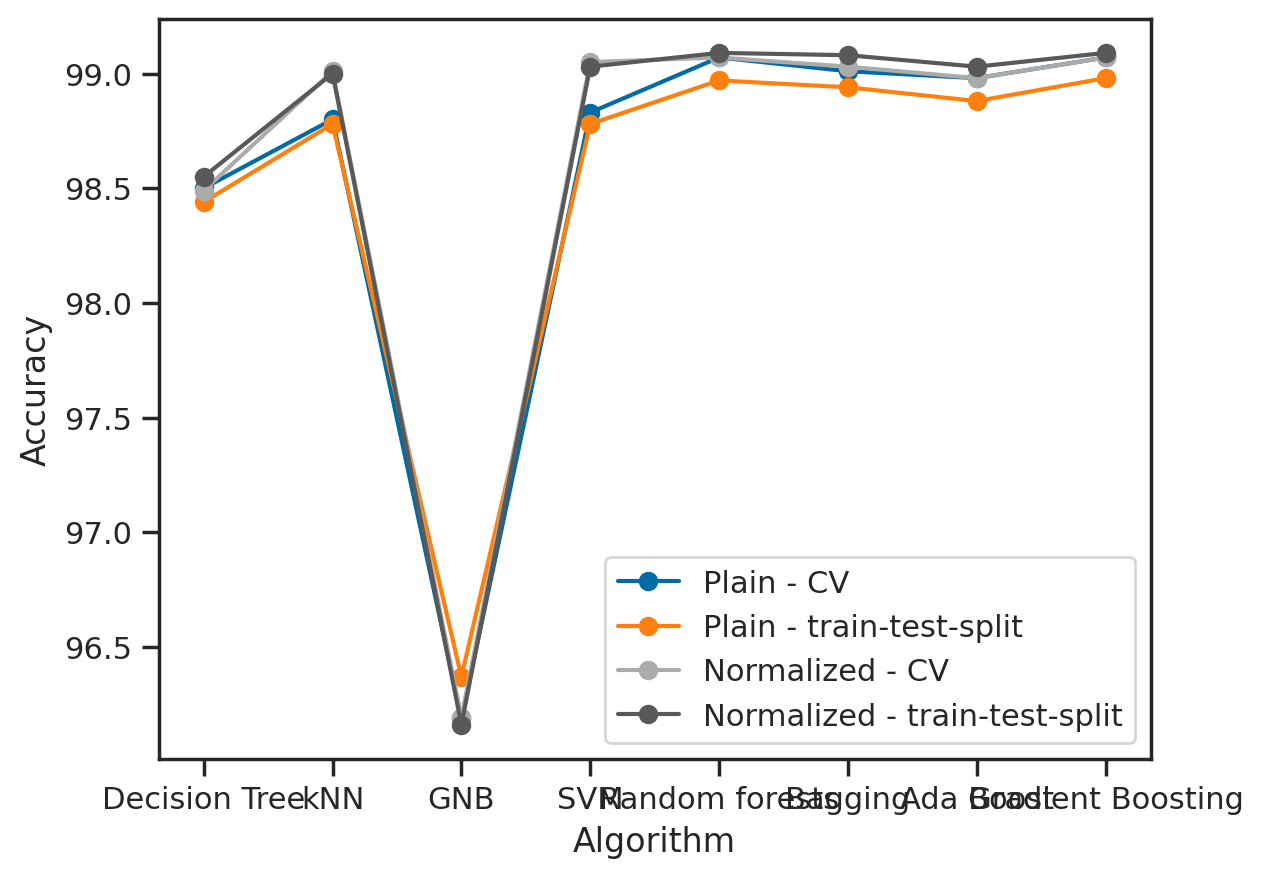

In [52]:
plt.plot(scores_final,'-o')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.legend(scores_final.columns)

<AxesSubplot:>

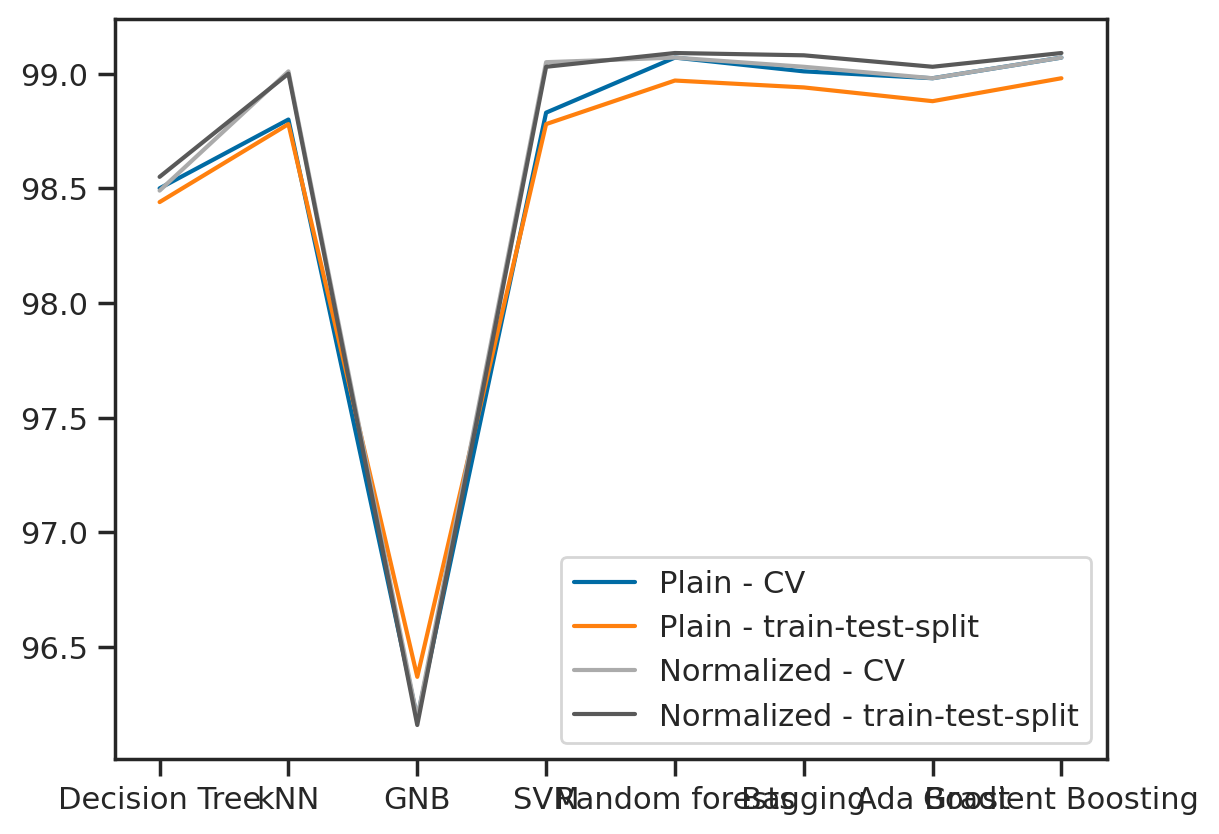

In [53]:
scores_final.plot()

### With standardization

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
df_train_standardized = df_train.copy()
df_train_standardized

Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0            133.171875  59.716081  0.043133 -0.703383         54.917224   
1             87.093750  36.257973  0.435469  2.266057          3.417224   
2            112.640625  39.818393  0.379639  0.922306          2.730769   
3            120.679688  45.918448 -0.098490  0.011775          2.696488   
4            134.070312  57.720107 -0.107772 -0.573335          1.107860   
...                 ...        ...       ...       ...               ...   
117559       132.843750  56.748838 -0.060070 -0.554084          4.054348   
117560       112.578125  52.539271  0.179580 -0.306961          1.637960   
117561       119.757812  49.980013  0.064402 -0.270822          3.877926   
117562       105.789062  46.986595  0.441426  0.372466          2.097826   
117563       113.515625  50.935956  0.031517 -0.443831         23.290970   

        SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0            70.084438        0.749798             -0.649512      0  
1            21.865069        7.039330             52.686251      0  
2            15.689690        8.193471             85.649785      0  
3            20.954662        8.183874             70.332899      0  
4            11.255051       16.107748            308.753765      0  
...                ...             ...                   ...    ...  
117559       27.844144        6.564423             44.442664      0  
117560       15.331913       11.384718            142.535470      0  
117561       19.788559        6.959740             56.367789      0  
117562       17.170612        9.442445             99.074539      0  
117563       62.006842        2.386364              4.001859      0  

[117564 rows x 9 columns]

In [56]:
df_train_standardized = pd.DataFrame(StandardScaler().fit_transform(df_train_standardized.iloc[:,:-1])).join(df_train_standardized.iloc[:,-1])
df_train_standardized

0         1         2         3         4         5         6  \
0       0.880240  2.130547 -0.408455 -0.397482  1.607581  2.190105 -1.897360   
1      -0.969814 -1.713208 -0.060358  0.058273 -0.319826 -0.215829 -0.259872   
2       0.055902 -1.129811 -0.109893 -0.147968 -0.345517 -0.523953  0.040610   
3       0.378674 -0.130280 -0.534109 -0.287718 -0.346800 -0.261254  0.038112   
4       0.916312  1.803494 -0.542344 -0.377522 -0.406255 -0.745222  2.101103   
...          ...       ...       ...       ...       ...       ...       ...   
117559  0.867065  1.644346 -0.500021 -0.374567 -0.295981  0.082501 -0.383515   
117560  0.053393  0.954583 -0.287393 -0.336638 -0.386416 -0.541804  0.871456   
117561  0.341660  0.535232 -0.389585 -0.331092 -0.302584 -0.319438 -0.280593   
117562 -0.219190  0.044743 -0.055072 -0.232359 -0.369205 -0.450062  0.365782   
117563  0.091034  0.691870 -0.418762 -0.357645  0.423957  1.787069 -1.471278   

               7  Class  
0      -1.182197      0  
1      -0.515181      0  
2      -0.102940      0  
3      -0.294493      0  
4       2.687193      0  
...          ...    ...  
117559 -0.618276      0  
117560  0.608471      0  
117561 -0.469140      0  
117562  0.064949      0  
117563 -1.124027      0  

[117564 rows x 9 columns]

In [57]:
df_train_standardized.columns = df_train.columns 
df_train_standardized

Mean_Integrated        SD        EK  Skewness  Mean_DMSNR_Curve  \
0              0.880240  2.130547 -0.408455 -0.397482          1.607581   
1             -0.969814 -1.713208 -0.060358  0.058273         -0.319826   
2              0.055902 -1.129811 -0.109893 -0.147968         -0.345517   
3              0.378674 -0.130280 -0.534109 -0.287718         -0.346800   
4              0.916312  1.803494 -0.542344 -0.377522         -0.406255   
...                 ...       ...       ...       ...               ...   
117559         0.867065  1.644346 -0.500021 -0.374567         -0.295981   
117560         0.053393  0.954583 -0.287393 -0.336638         -0.386416   
117561         0.341660  0.535232 -0.389585 -0.331092         -0.302584   
117562        -0.219190  0.044743 -0.055072 -0.232359         -0.369205   
117563         0.091034  0.691870 -0.418762 -0.357645          0.423957   

        SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0             2.190105       -1.897360             -1.182197      0  
1            -0.215829       -0.259872             -0.515181      0  
2            -0.523953        0.040610             -0.102940      0  
3            -0.261254        0.038112             -0.294493      0  
4            -0.745222        2.101103              2.687193      0  
...                ...             ...                   ...    ...  
117559        0.082501       -0.383515             -0.618276      0  
117560       -0.541804        0.871456              0.608471      0  
117561       -0.319438       -0.280593             -0.469140      0  
117562       -0.450062        0.365782              0.064949      0  
117563        1.787069       -1.471278             -1.124027      0  

[117564 rows x 9 columns]

In [58]:
X_standard, y_standard = df_train_standardized.iloc[:,:-1], df_train_standardized.iloc[:,-1]
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard, y_standard, train_size = 0.8, stratify = y_standard)

X_standard.shape
y_standard.shape

(117564, 8)

(117564,)

In [59]:
clf_tree_standard = DecisionTreeClassifier()
clf_tree_standard.fit(X_train_standard, y_train_standard)
clf_tree_standard.score(X_test_standard, y_test_standard)

clf_knn_standard = KNeighborsClassifier()
clf_knn_standard.fit(X_train_standard, y_train_standard)
clf_knn_standard.score(X_test_standard, y_test_standard)

clf_gnb_standard = GaussianNB()
clf_gnb_standard.fit(X_train_standard, y_train_standard)
clf_gnb_standard.score(X_test_standard, y_test_standard)

clf_svm_standard = SVC()
clf_svm_standard.fit(X_train_standard, y_train_standard)
clf_svm_standard.score(X_test_standard, y_test_standard)

clf_rf_standard = RandomForestClassifier()
clf_rf_standard.fit(X_train_standard, y_train_standard)
clf_rf_standard.score(X_test_standard, y_test_standard)

clf_boost_standard = AdaBoostClassifier()
clf_boost_standard.fit(X_train_standard, y_train_standard)
clf_boost_standard.score(X_test_standard, y_test_standard)

clf_bag_standard = BaggingClassifier()
clf_bag_standard.fit(X_train_standard, y_train_standard)
clf_bag_standard.score(X_test_standard, y_test_standard)

clf_gb_standard = GradientBoostingClassifier()
clf_gb_standard.fit(X_train_standard, y_train_standard)
clf_gb_standard.score(X_test_standard, y_test_standard)

DecisionTreeClassifier()

0.9858801514056054

KNeighborsClassifier()

0.9909837111385191

GaussianNB()

0.9624888359630842

SVC()

0.991068770467401

RandomForestClassifier()

0.9916216561051333

AdaBoostClassifier()

0.9904733551652277

BaggingClassifier()

0.9913239484540467

GradientBoostingClassifier()

0.9914090077829286

In [60]:
print("Model performance on various algorithms")
print("---------------------------------------")

clf_tree_cv_standard = cross_val_score(DecisionTreeClassifier(), X_standard, y_standard, cv=5)
print("Decision tree",round(np.mean(clf_tree_cv_standard), 4) * 100,"%")
print()

clf_knn_cv_standard = cross_val_score(KNeighborsClassifier(), X_standard, y_standard, cv=5)
print("kNN",round(np.mean(clf_knn_cv_standard), 4) * 100,"%")
print()

clf_gnb_cv_standard = cross_val_score(GaussianNB(), X_standard, y_standard, cv=5)
print("GNB",round(np.mean(clf_gnb_cv_standard), 4) * 100,"%")
print()

clf_svm_cv_standard = cross_val_score(SVC(), X_standard, y_standard, cv=5)
print("SVM",round(np.mean(clf_svm_cv_standard), 4) * 100,"%")
print()

clf_rf_cv_standard = cross_val_score(RandomForestClassifier() , X_standard, y_standard, cv=5)
print("Random forests",round(np.mean(clf_rf_cv_standard), 4) * 100,"%")
print()

clf_bag_cv_standard = cross_val_score(BaggingClassifier() , X_standard, y_standard, cv=5)
print("Bagging",round(np.mean(clf_bag_cv_standard), 4) * 100,"%")
print()

clf_boost_cv_standard = cross_val_score(AdaBoostClassifier() , X_standard, y_standard, cv=5)
print("Ada boost",round(np.mean(clf_boost_cv_standard), 4) * 100,"%")
print()

clf_grad_boost_cv_standard = cross_val_score(GradientBoostingClassifier() , X_standard, y_standard, cv=5)
print("Gradient boosting",round(np.mean(clf_grad_boost_cv_standard), 4) * 100,"%")
print()

Model performance on various algorithms
---------------------------------------
Decision tree 98.49 %

kNN 99.0 %

GNB 96.19 %

SVM 99.05000000000001 %

Random forests 99.08 %

Bagging 99.03 %

Ada boost 98.98 %

Gradient boosting 99.07000000000001 %



In [61]:
# Since you have splitted train into train and test. Now train using whole train.csv and give it to test.csv
# More data means more clarity about the model. So, dont lose test part in train.csv while predicting test.csv

In [62]:
scores_standard = pd.DataFrame({
                        "Standardized - CV": [
                                  round(np.mean(clf_tree_cv_standard), 4) * 100,
                                  round(np.mean(clf_knn_cv_standard), 4) * 100,
                                  round(np.mean(clf_gnb_cv_standard), 4) * 100,
                                  round(np.mean(clf_svm_cv_standard), 4) * 100,
                                  round(np.mean(clf_rf_cv_standard), 4) * 100,
                                  round(np.mean(clf_bag_cv_standard), 4) * 100,
                                  round(np.mean(clf_boost_cv_standard), 4) * 100,
                                  round(np.mean(clf_grad_boost_cv_standard), 4) * 100
                                 ],
                        "Standardized - train-test-split": [
                              round(clf_tree_standard.score(X_test_standard, y_test_standard), 4) * 100,
                              round(clf_knn_standard.score(X_test_standard, y_test_standard), 4) * 100,
                              round(clf_gnb_standard.score(X_test_standard, y_test_standard), 4) * 100,
                              round(clf_svm_standard.score(X_test_standard, y_test_standard), 4) * 100,
                              round(clf_rf_standard.score(X_test_standard, y_test_standard), 4) * 100,
                              round(clf_bag_standard.score(X_test_standard, y_test_standard), 4) * 100,
                              round(clf_boost_standard.score(X_test_standard, y_test_standard), 4) * 100,
                              round(clf_gb_standard.score(X_test_standard, y_test_standard), 4) * 100,
                             ]
                        },
                        index = ["Decision Tree", "kNN", "GNB", "SVM" , "Random forests", "Bagging", "Ada Boost", "Gradient Boosting"] )
scores_standard

Standardized - CV  Standardized - train-test-split
Decision Tree                  98.49                            98.59
kNN                            99.00                            99.10
GNB                            96.19                            96.25
SVM                            99.05                            99.11
Random forests                 99.08                            99.16
Bagging                        99.03                            99.13
Ada Boost                      98.98                            99.05
Gradient Boosting              99.07                            99.14

In [63]:
scores_final.columns
# scores_final.drop(['Standardized - CV', 'Standardized - train-test-split'], axis = 1, inplace = True)

Index(['Plain - CV', 'Plain - train-test-split', 'Normalized - CV',
       'Normalized - train-test-split'],
      dtype='object')

In [64]:
scores_final.join(scores_standard)

Plain - CV  Plain - train-test-split  Normalized - CV  \
Decision Tree           98.50                     98.44            98.49   
kNN                     98.80                     98.78            99.01   
GNB                     96.19                     96.37            96.19   
SVM                     98.83                     98.78            99.05   
Random forests          99.07                     98.97            99.07   
Bagging                 99.01                     98.94            99.03   
Ada Boost               98.98                     98.88            98.98   
Gradient Boosting       99.07                     98.98            99.07   

                   Normalized - train-test-split  Standardized - CV  \
Decision Tree                              98.55              98.49   
kNN                                        99.00              99.00   
GNB                                        96.16              96.19   
SVM                                        99.03              99.05   
Random forests                             99.09              99.08   
Bagging                                    99.08              99.03   
Ada Boost                                  99.03              98.98   
Gradient Boosting                          99.09              99.07   

                   Standardized - train-test-split  
Decision Tree                                98.59  
kNN                                          99.10  
GNB                                          96.25  
SVM                                          99.11  
Random forests                               99.16  
Bagging                                      99.13  
Ada Boost                                    99.05  
Gradient Boosting                            99.14

In [65]:
scores_final = scores_final.join(scores_standard)

Text(0.5, 0, 'Algorithm')

Text(0, 0.5, 'Accuracy')

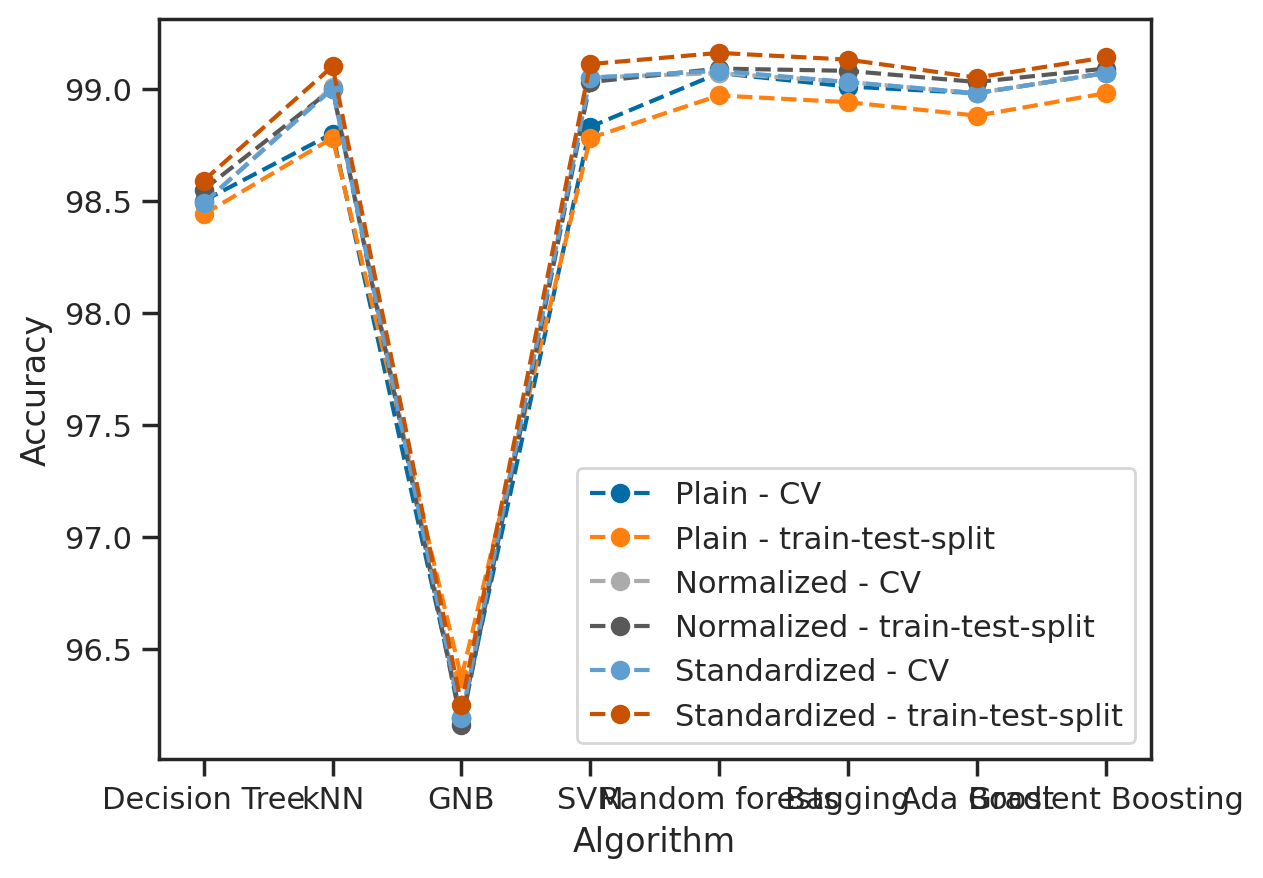

In [66]:
plt.plot(scores_final,'--o')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.legend(scores_final.columns)

<AxesSubplot:>

Text(0.5, 0, 'Algorithm')

Text(0, 0.5, 'Accuracy')

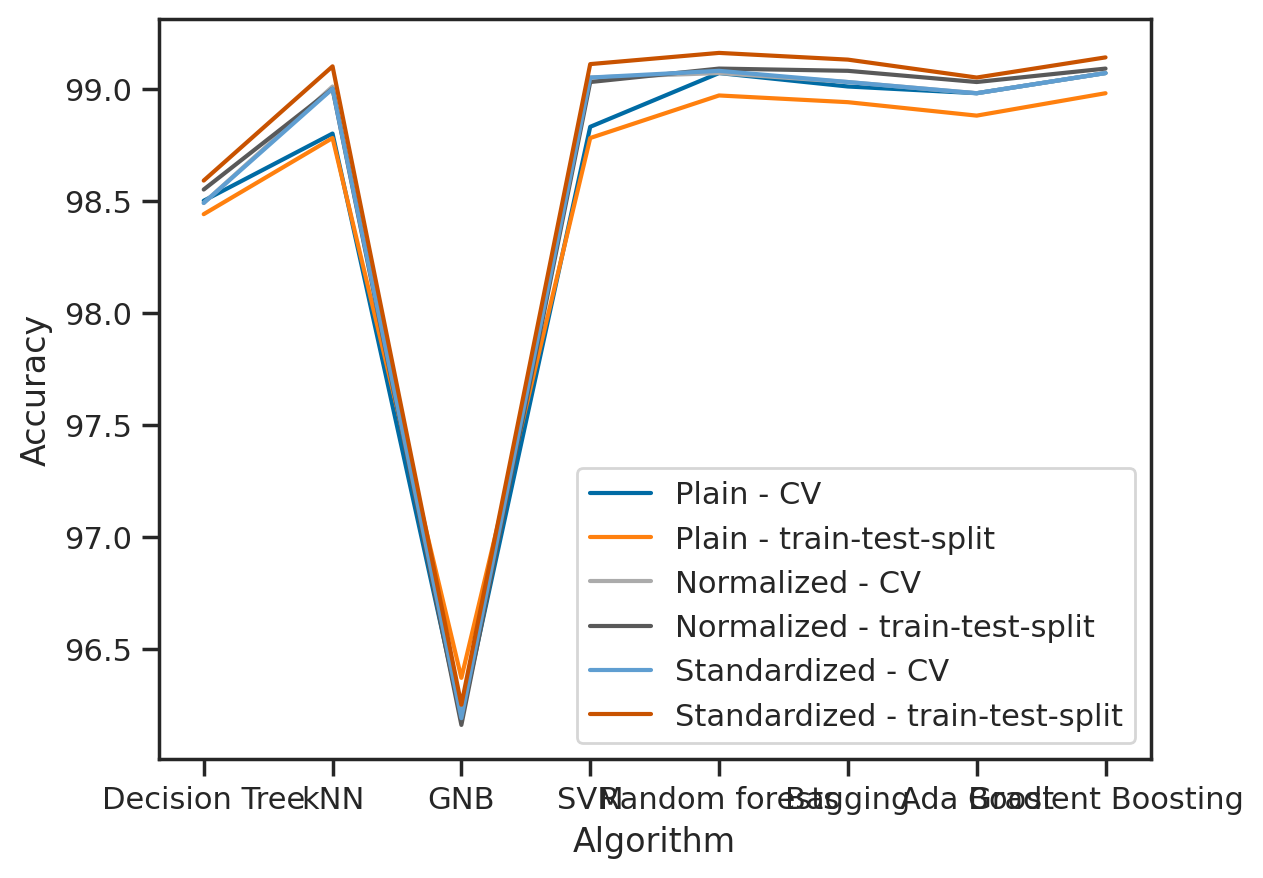

In [67]:
scores_final.plot()
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")

<AxesSubplot:>

Text(0.5, 0, 'Algorithm')

Text(0, 0.5, 'Accuracy')

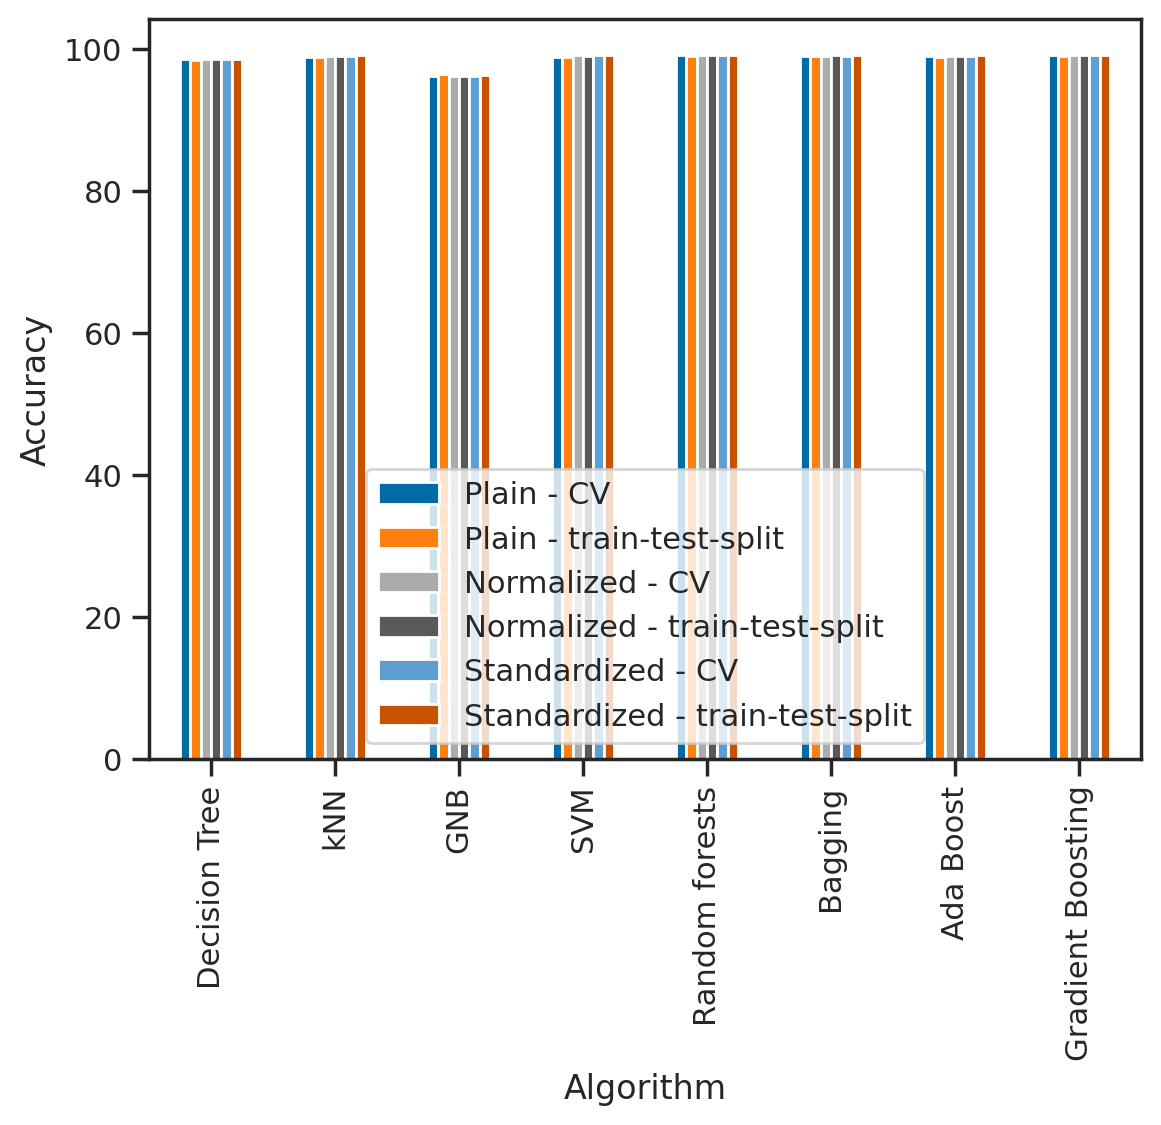

In [68]:
scores_final.plot.bar()
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")

### While submitting the model, any changes made to train, make the changes like standardization and normalization to test.csv as well. Otherwise model will be poor.

## Questions to answer

- Which algo to choose for test.csv?
    - Since all algos are performing better, use majority voting.
- Train test split or CV for test.csv?
- Raw/Normalization/Standarization for test.csv?

In [69]:
from sklearn.ensemble import VotingClassifier

In [70]:
clf_voting_cv = VotingClassifier(estimators = [
                                                  ('dt',clf_tree), 
                                                  ('knn',clf_knn), 
                                                  ('gnb',clf_gnb),
                                                  ('svm',clf_svm),
                                                  ('rf',clf_rf),
                                                  ('bag',clf_bag),
                                                  ('adaboost',clf_boost),
                                                  ('gradboost',clf_gb)
                                              ], 
                                  voting = 'hard')

clf_voting_cv = cross_val_score(clf_voting_cv, df_train.iloc[:,:-1], df_train.iloc[:,-1], cv = 3)
print("Majority voting",round(np.mean(clf_voting_cv), 4) * 100,"%")
print()

Majority voting 99.03 %



In [71]:
clf_voting = VotingClassifier(estimators = [
                                              ('dt',clf_tree), 
                                              ('knn',clf_knn), 
                                              ('gnb',clf_gnb),
                                              ('svm',clf_svm),
                                              ('rf',clf_rf),
                                              ('bag',clf_bag),
                                              ('adaboost',clf_boost),
                                              ('gradboost',clf_gb)
                                          ], 
                              voting = 'hard')
clf_voting.fit(X_train, y_train)
clf_voting.score(X_test, y_test)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('gnb', GaussianNB()), ('svm', SVC()),
                             ('rf', RandomForestClassifier()),
                             ('bag', BaggingClassifier()),
                             ('adaboost', AdaBoostClassifier()),
                             ('gradboost', GradientBoostingClassifier())])

0.9897078212052907

#### Normalized

In [72]:
X_normalized
y_normalized

Mean_Integrated        SD        EK  Skewness  Mean_DMSNR_Curve  \
0              0.693445  0.507599  0.184583  0.016203          0.251909   
1              0.442081  0.166736  0.225407  0.060406          0.014754   
2              0.581444  0.218471  0.219597  0.040403          0.011593   
3              0.625298  0.307110  0.169846  0.026849          0.011435   
4              0.698346  0.478596  0.168880  0.018139          0.004120   
...                 ...       ...       ...       ...               ...   
117559         0.691655  0.464483  0.173844  0.018426          0.017688   
117560         0.581103  0.403315  0.198780  0.022104          0.006561   
117561         0.620269  0.366127  0.186796  0.022642          0.016876   
117562         0.544068  0.322631  0.226027  0.032218          0.008679   
117563         0.586217  0.380018  0.183374  0.020067          0.106272   

        SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  
0             0.611722        0.090142              0.001113  
1             0.141383        0.259499              0.045821  
2             0.081147        0.290576              0.073452  
3             0.132503        0.290318              0.060613  
4             0.037891        0.503683              0.260466  
...                ...             ...                   ...  
117559        0.199704        0.246711              0.038911  
117560        0.077658        0.376506              0.121136  
117561        0.121128        0.257356              0.048907  
117562        0.095593        0.324207              0.084705  
117563        0.532932        0.134210              0.005012  

[117564 rows x 8 columns]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
117559    0.0
117560    0.0
117561    0.0
117562    0.0
117563    0.0
Name: Class, Length: 117564, dtype: float64

In [73]:
# clf_voting_cv_normalized = VotingClassifier(estimators = [
#                                                   ('dt_normalized',clf_tree_cv_normalized), 
#                                                   ('knn_normalized',clf_knn_normalized), 
#                                                   ('gnb_normalized',clf_gnb_normalized),
#                                                   ('svm_normalized',clf_svm_normalized),
#                                                   ('rf_normalized',clf_rf_normalized),
#                                                   ('bag_normalized',clf_bag_normalized),
#                                                   ('adaboost_normalized',clf_boost_normalized),
#                                                   ('gradboost_normalized',clf_gb_normalized)
#                                               ], 
#                                   voting = 'hard')

clf_voting_cv_normalized = cross_val_score(VotingClassifier(estimators = [
                                                  ('dt_normalized',clf_tree_cv_normalized), 
                                                  ('knn_normalized',clf_knn_normalized), 
                                                  ('gnb_normalized',clf_gnb_normalized),
                                                  ('svm_normalized',clf_svm_normalized),
                                                  ('rf_normalized',clf_rf_normalized),
                                                  ('bag_normalized',clf_bag_normalized),
                                                  ('adaboost_normalized',clf_boost_normalized),
                                                  ('gradboost_normalized',clf_gb_normalized)
                                              ], 
                                  voting = 'hard'), X_normalized, y_normalized, cv = 3)
print("Majority voting_normalized", round(np.mean(clf_voting_cv_normalized), 4) * 100,"%")
print()

Majority voting_normalized nan %



/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py:251: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py:261: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py:251: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py:261: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py:251: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/opt/conda

In [74]:
clf_voting_normalized = VotingClassifier(estimators = [
                                              ('dt_normalized',clf_tree_normalized), 
                                              ('knn_normalized',clf_knn_normalized), 
                                              ('gnb_normalized',clf_gnb_normalized),
                                              ('svm_normalized',clf_svm_normalized),
                                              ('rf_normalized',clf_rf_normalized),
                                              ('bag_normalized',clf_bag_normalized),
                                              ('adaboost_normalized',clf_boost_normalized),
                                              ('gradboost_normalized',clf_gb_normalized)
                                          ], 
                              voting = 'hard')
clf_voting_normalized.fit(X_train_normalized, y_train_normalized)
clf_voting_normalized.score(X_test_normalized, y_test_normalized)

VotingClassifier(estimators=[('dt_normalized', DecisionTreeClassifier()),
                             ('knn_normalized', KNeighborsClassifier()),
                             ('gnb_normalized', GaussianNB()),
                             ('svm_normalized', SVC()),
                             ('rf_normalized', RandomForestClassifier()),
                             ('bag_normalized', BaggingClassifier()),
                             ('adaboost_normalized', AdaBoostClassifier()),
                             ('gradboost_normalized',
                              GradientBoostingClassifier())])

0.9906434738229916

#### Standardization

In [75]:
clf_voting_standard = VotingClassifier(estimators = [
                                              ('dt_standard',clf_tree_standard), 
                                              ('knn_standard',clf_knn_standard), 
                                              ('gnb_standard',clf_gnb_standard),
                                              ('svm_standard',clf_svm_standard),
                                              ('rf_standard',clf_rf_standard),
                                              ('bag_standard',clf_bag_standard),
                                              ('adaboost_standard',clf_boost_standard),
                                              ('gradboost_standard',clf_gb_standard)
                                          ], 
                              voting = 'hard')
clf_voting_standard.fit(X_train_standard, y_train_standard)
clf_voting_standard.score(X_test_standard, y_test_standard)

VotingClassifier(estimators=[('dt_standard', DecisionTreeClassifier()),
                             ('knn_standard', KNeighborsClassifier()),
                             ('gnb_standard', GaussianNB()),
                             ('svm_standard', SVC()),
                             ('rf_standard', RandomForestClassifier()),
                             ('bag_standard', BaggingClassifier()),
                             ('adaboost_standard', AdaBoostClassifier()),
                             ('gradboost_standard',
                              GradientBoostingClassifier())])

0.9913239484540467

In [76]:
clf_voting_cv_standard = VotingClassifier(estimators = [
                                              ('dt_standard', clf_tree_standard), 
                                              ('knn_standard', clf_knn_standard), 
                                              ('gnb_standard', clf_gnb_standard),
                                              ('svm_standard', clf_svm_standard),
                                              ('rf_standard', clf_rf_standard),
                                              ('bag_standard', clf_bag_standard),
                                              ('adaboost_standard', clf_boost_standard),
                                              ('gradboost_standard', clf_gb_standard)
                                          ], 
                              voting = 'hard')
clf_voting_cv_standard = cross_val_score(clf_voting_cv_standard, X_standard, y_standard, cv = 3)
print("Majority voting CV_standard", round(np.mean(clf_voting_cv_standard), 4) * 100,"%")
print()

Majority voting CV_standard 99.05000000000001 %



In [77]:
scores_final

Plain - CV  Plain - train-test-split  Normalized - CV  \
Decision Tree           98.50                     98.44            98.49   
kNN                     98.80                     98.78            99.01   
GNB                     96.19                     96.37            96.19   
SVM                     98.83                     98.78            99.05   
Random forests          99.07                     98.97            99.07   
Bagging                 99.01                     98.94            99.03   
Ada Boost               98.98                     98.88            98.98   
Gradient Boosting       99.07                     98.98            99.07   

                   Normalized - train-test-split  Standardized - CV  \
Decision Tree                              98.55              98.49   
kNN                                        99.00              99.00   
GNB                                        96.16              96.19   
SVM                                        99.03              99.05   
Random forests                             99.09              99.08   
Bagging                                    99.08              99.03   
Ada Boost                                  99.03              98.98   
Gradient Boosting                          99.09              99.07   

                   Standardized - train-test-split  
Decision Tree                                98.59  
kNN                                          99.10  
GNB                                          96.25  
SVM                                          99.11  
Random forests                               99.16  
Bagging                                      99.13  
Ada Boost                                    99.05  
Gradient Boosting                            99.14

In [78]:
clf_voting.score(X_test, y_test)
clf_voting_normalized.score(X_test_normalized, y_test_normalized)
clf_voting_standard.score(X_test_standard, y_test_standard)

0.9897078212052907

0.9906434738229916

0.9913239484540467

In [79]:
round(np.mean(clf_voting_cv), 4) * 100
# clf_voting_cv_normalized
round(np.mean(clf_voting_cv_standard), 4) * 100

99.03

99.05000000000001

In [80]:
scores_final.columns

Index(['Plain - CV', 'Plain - train-test-split', 'Normalized - CV',
       'Normalized - train-test-split', 'Standardized - CV',
       'Standardized - train-test-split'],
      dtype='object')

In [81]:
scores_final

Plain - CV  Plain - train-test-split  Normalized - CV  \
Decision Tree           98.50                     98.44            98.49   
kNN                     98.80                     98.78            99.01   
GNB                     96.19                     96.37            96.19   
SVM                     98.83                     98.78            99.05   
Random forests          99.07                     98.97            99.07   
Bagging                 99.01                     98.94            99.03   
Ada Boost               98.98                     98.88            98.98   
Gradient Boosting       99.07                     98.98            99.07   

                   Normalized - train-test-split  Standardized - CV  \
Decision Tree                              98.55              98.49   
kNN                                        99.00              99.00   
GNB                                        96.16              96.19   
SVM                                        99.03              99.05   
Random forests                             99.09              99.08   
Bagging                                    99.08              99.03   
Ada Boost                                  99.03              98.98   
Gradient Boosting                          99.09              99.07   

                   Standardized - train-test-split  
Decision Tree                                98.59  
kNN                                          99.10  
GNB                                          96.25  
SVM                                          99.11  
Random forests                               99.16  
Bagging                                      99.13  
Ada Boost                                    99.05  
Gradient Boosting                            99.14

In [82]:
scores_final = scores_final.append({
                       scores_final.columns[0] : (round(np.mean(clf_voting_cv), 4) * 100),
                       scores_final.columns[1] : clf_voting.score(X_test, y_test),
                       scores_final.columns[2] : 0,
                       scores_final.columns[3] : clf_voting_normalized.score(X_test_normalized, y_test_normalized),
                       scores_final.columns[4] : (round(np.mean(clf_voting_cv_standard), 4) * 100),
                       scores_final.columns[5] : clf_voting_standard.score(X_test_standard, y_test_standard)                   
    }, ignore_index = True)
scores_final

Plain - CV  Plain - train-test-split  Normalized - CV  \
0       98.50                 98.440000            98.49   
1       98.80                 98.780000            99.01   
2       96.19                 96.370000            96.19   
3       98.83                 98.780000            99.05   
4       99.07                 98.970000            99.07   
5       99.01                 98.940000            99.03   
6       98.98                 98.880000            98.98   
7       99.07                 98.980000            99.07   
8       99.03                  0.989708             0.00   

   Normalized - train-test-split  Standardized - CV  \
0                      98.550000              98.49   
1                      99.000000              99.00   
2                      96.160000              96.19   
3                      99.030000              99.05   
4                      99.090000              99.08   
5                      99.080000              99.03   
6                      99.030000              98.98   
7                      99.090000              99.07   
8                       0.990643              99.05   

   Standardized - train-test-split  
0                        98.590000  
1                        99.100000  
2                        96.250000  
3                        99.110000  
4                        99.160000  
5                        99.130000  
6                        99.050000  
7                        99.140000  
8                         0.991324

In [83]:
scores_final.index = ["Decision Tree",
                     "kNN",
                     "GNB",
                     "SVM",
                     "Random forests",
                     "Bagging",
                     "Ada Boost",
                     "Gradient Boosting",
                     "Majority Voting"]
scores_final

Plain - CV  Plain - train-test-split  Normalized - CV  \
Decision Tree           98.50                 98.440000            98.49   
kNN                     98.80                 98.780000            99.01   
GNB                     96.19                 96.370000            96.19   
SVM                     98.83                 98.780000            99.05   
Random forests          99.07                 98.970000            99.07   
Bagging                 99.01                 98.940000            99.03   
Ada Boost               98.98                 98.880000            98.98   
Gradient Boosting       99.07                 98.980000            99.07   
Majority Voting         99.03                  0.989708             0.00   

                   Normalized - train-test-split  Standardized - CV  \
Decision Tree                          98.550000              98.49   
kNN                                    99.000000              99.00   
GNB                                    96.160000              96.19   
SVM                                    99.030000              99.05   
Random forests                         99.090000              99.08   
Bagging                                99.080000              99.03   
Ada Boost                              99.030000              98.98   
Gradient Boosting                      99.090000              99.07   
Majority Voting                         0.990643              99.05   

                   Standardized - train-test-split  
Decision Tree                            98.590000  
kNN                                      99.100000  
GNB                                      96.250000  
SVM                                      99.110000  
Random forests                           99.160000  
Bagging                                  99.130000  
Ada Boost                                99.050000  
Gradient Boosting                        99.140000  
Majority Voting                           0.991324

In [84]:
scores_final.loc[ 'Majority Voting', 'Plain - train-test-split'] = scores_final.loc[ 'Majority Voting', 'Plain - train-test-split'] * 100
scores_final.loc[ 'Majority Voting', 'Normalized - train-test-split'] = scores_final.loc[ 'Majority Voting', 'Normalized - train-test-split'] * 100
scores_final.loc[ 'Majority Voting', 'Standardized - train-test-split'] = scores_final.loc[ 'Majority Voting', 'Standardized - train-test-split'] * 100

In [85]:
scores_final

Plain - CV  Plain - train-test-split  Normalized - CV  \
Decision Tree           98.50                 98.440000            98.49   
kNN                     98.80                 98.780000            99.01   
GNB                     96.19                 96.370000            96.19   
SVM                     98.83                 98.780000            99.05   
Random forests          99.07                 98.970000            99.07   
Bagging                 99.01                 98.940000            99.03   
Ada Boost               98.98                 98.880000            98.98   
Gradient Boosting       99.07                 98.980000            99.07   
Majority Voting         99.03                 98.970782             0.00   

                   Normalized - train-test-split  Standardized - CV  \
Decision Tree                          98.550000              98.49   
kNN                                    99.000000              99.00   
GNB                                    96.160000              96.19   
SVM                                    99.030000              99.05   
Random forests                         99.090000              99.08   
Bagging                                99.080000              99.03   
Ada Boost                              99.030000              98.98   
Gradient Boosting                      99.090000              99.07   
Majority Voting                        99.064347              99.05   

                   Standardized - train-test-split  
Decision Tree                            98.590000  
kNN                                      99.100000  
GNB                                      96.250000  
SVM                                      99.110000  
Random forests                           99.160000  
Bagging                                  99.130000  
Ada Boost                                99.050000  
Gradient Boosting                        99.140000  
Majority Voting                          99.132395

In [86]:
scores_final.style.highlight_max()


In [87]:
scores_final.T.style.highlight_max()

<AxesSubplot:>

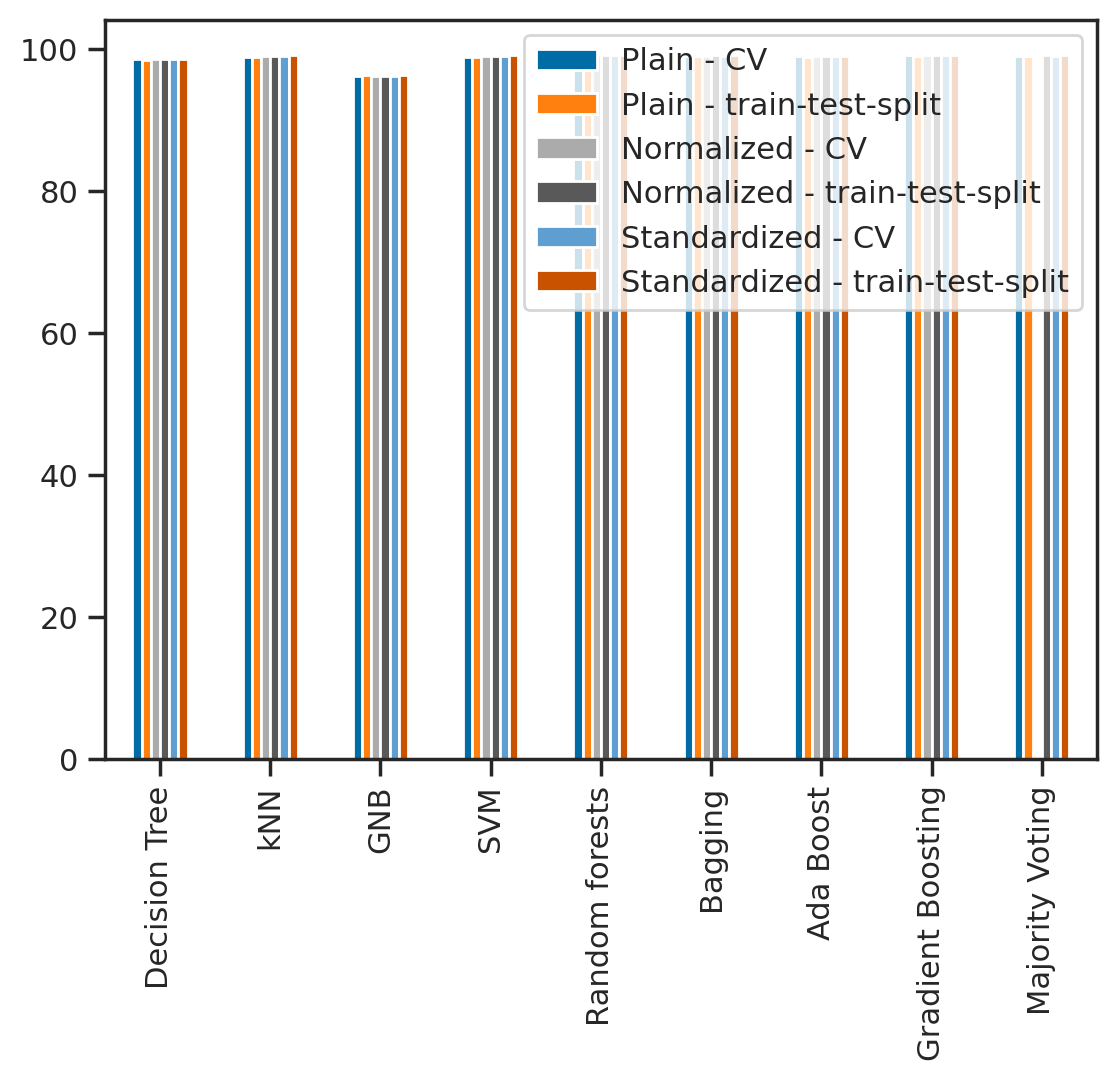

In [88]:
scores_final.plot.bar()

# Testing time!

In [89]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e10/test.csv')
df_test

id  Mean_Integrated         SD        EK  Skewness  \
0      117564       140.046875  54.507800  0.058862 -0.567263   
1      117565       107.828125  51.578965  0.284368 -0.338430   
2      117566       135.062500  49.812343 -0.087784 -0.094341   
3      117567       112.812500  41.926647  0.519921  1.287762   
4      117568        96.210938  35.322620  0.481286  2.443080   
...       ...              ...        ...       ...       ...   
78372  195936       119.328125  46.449223  0.227636  0.161986   
78373  195937       125.835938  43.986678  0.078460  0.077917   
78374  195938       131.789062  43.493074  0.049140  0.402859   
78375  195939        79.476562  42.579993  0.817383  1.818474   
78376  195940        68.265625  39.611800  1.924393  5.348909   

       Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  
0              2.337793       14.868335        9.591760            117.988781  
1              1.574415       12.501437       11.694968            182.704822  
2              3.576923       21.243336        7.252386             59.021499  
3              6.669732       29.013153        5.097661             27.105240  
4              2.218227       17.041064        9.766006            117.131775  
...                 ...             ...             ...                   ...  
78372          1.120401       13.883072       14.153556            213.485463  
78373          2.342809       13.008583        9.907167            136.815454  
78374          2.116221       14.639555       10.898768            147.929016  
78375          1.903010       15.844982       10.723755            143.273847  
78376         20.903010       55.143702        2.489474              5.413000  

[78377 rows x 9 columns]

In [90]:
scores_final.style.highlight_max()
scores_final.T.style.highlight_max()

- ## We see that Random forests has maximum value 4 times. So choosing it for testing

In [91]:
pred_y = clf_rf.predict(df_test.drop(['id'], axis = 1))
pred_y

array([0, 0, 0, ..., 0, 0, 1])

In [92]:
submission = pd.DataFrame({"id": df_test.loc[:,'id'].values,
               "Class": pred_y
              })
submission

id  Class
0      117564      0
1      117565      0
2      117566      0
3      117567      0
4      117568      0
...       ...    ...
78372  195936      0
78373  195937      0
78374  195938      0
78375  195939      0
78376  195940      1

[78377 rows x 2 columns]

In [93]:
submission.to_csv('submission.csv', index=None)

In [94]:
np.bincount(pred_y)

array([71494,  6883])

In [96]:
# GB

df_test_gb = df_test.copy()
df_test_gb.columns = df_test.columns 

clf_gb_pred = clf_gb.predict(df_test_gb.drop(['id'], axis = 1))
clf_gb_pred

df_sample_gb = pd.read_csv('/kaggle/input/playground-series-s3e10/sample_submission.csv')
df_sample_gb

df_sample_gb['Class'] = clf_gb_pred
df_sample_gb

df_sample_gb.to_csv('submission.csv', index=None)

array([0, 0, 0, ..., 0, 0, 1])

id  Class
0      117564    0.5
1      117565    0.5
2      117566    0.5
3      117567    0.5
4      117568    0.5
...       ...    ...
78372  195936    0.5
78373  195937    0.5
78374  195938    0.5
78375  195939    0.5
78376  195940    0.5

[78377 rows x 2 columns]

id  Class
0      117564      0
1      117565      0
2      117566      0
3      117567      0
4      117568      0
...       ...    ...
78372  195936      0
78373  195937      0
78374  195938      0
78375  195939      0
78376  195940      1

[78377 rows x 2 columns]